In [1]:
import pandas as pd
import matplotlib.pylab as plt
import math

In [2]:
plt.rcParams['figure.dpi'] = 200

In [3]:
df = pd.read_csv("data/World Energy Consumption.csv", encoding = "ISO-8859-1", engine='python')

In [4]:
df = df[df.columns.difference(['iso_code'])]

In [5]:
df.shape

(17432, 121)

In [6]:
columns_names = df.columns.tolist()

In [7]:
df.year.describe()

count    17432.000000
mean      1973.094367
std         34.333995
min       1900.000000
25%       1946.000000
50%       1983.000000
75%       2002.000000
max       2020.000000
Name: year, dtype: float64

In [8]:
# In function of the countries found in the last data base, we are gonna focus on those ones
# Note: In the last data base USA wasn't inside, but here this countries it does inside this one
countries_names = ['Sweden', 'Singapore', 'Switzerland', 'Netherlands', 'Finland', 'United States', 'Russia', 'China']

# Checking the variables to be selected

In [9]:
df['gdp_b'] = df.gdp/1e+6                         # Variable in billions
df['gdp_per_capita'] = df.gdp/df.population

In [10]:
ts_mean = df
ts_sum = df

In [11]:
ts_mean = ts_mean.groupby(['year']).mean()
ts_mean = ts_mean.reset_index()

ts_sum = ts_sum.groupby(['year']).sum()
ts_sum = ts_sum.reset_index()

In [12]:
ts_mean.shape

(121, 122)

In [13]:
df.year.describe()

count    17432.000000
mean      1973.094367
std         34.333995
min       1900.000000
25%       1946.000000
50%       1983.000000
75%       2002.000000
max       2020.000000
Name: year, dtype: float64

In [14]:
#     Some years are missing
from statistics import mean
a = list(range(1900, 2021))
mean(a)

1960

In [15]:
var_columns = list(ts_mean.isnull().sum().index)
amount_null = list(ts_mean.isnull().sum().values)


my_dict = {'columnillas': var_columns, 'amountNull': amount_null}
ts_check_null= pd.DataFrame.from_dict(my_dict)
ts_check_null

columnillas  amountNull
0                       year           0
1    biofuel_cons_change_pct          92
2    biofuel_cons_change_twh           1
3    biofuel_cons_per_capita           1
4        biofuel_consumption           1
..                       ...         ...
117   wind_energy_per_capita          66
118          wind_share_elec          85
119        wind_share_energy          66
120                    gdp_b           4
121           gdp_per_capita           4

[122 rows x 2 columns]

Once we got the mean of every variable grouped by "year", got that the variables with less null data are:

In [100]:
ts_important_columns = ts_check_null.loc[ts_check_null.amountNull < 60, ]
columns_names = ts_important_columns.columnillas.value_counts().index.tolist()
columns_names.remove('year')
columns_names.remove('gdp')
columns_names.remove('gdp_per_capita')
columns_names.sort()
print(ts_important_columns.shape)
print(" ")
print(columns_names)
print(" ")
ts_important_columns

(20, 2)
 
['biofuel_cons_change_twh', 'biofuel_cons_per_capita', 'biofuel_consumption', 'coal_prod_change_pct', 'coal_prod_change_twh', 'coal_prod_per_capita', 'coal_production', 'gas_prod_change_pct', 'gas_prod_change_twh', 'gas_prod_per_capita', 'gas_production', 'gdp_b', 'oil_prod_change_pct', 'oil_prod_change_twh', 'oil_prod_per_capita', 'oil_production', 'population']
 


columnillas  amountNull
0                       year           0
2    biofuel_cons_change_twh           1
3    biofuel_cons_per_capita           1
4        biofuel_consumption           1
16      coal_prod_change_pct           2
17      coal_prod_change_twh           2
18      coal_prod_per_capita           1
19           coal_production           1
41       gas_prod_change_pct           2
42       gas_prod_change_twh           2
43       gas_prod_per_capita           1
44            gas_production           1
47                       gdp           4
78       oil_prod_change_pct           2
79       oil_prod_change_twh           2
80       oil_prod_per_capita           1
81            oil_production           1
94                population           1
120                    gdp_b           4
121           gdp_per_capita           4

# Plotting time series by mean()

We have to point out, that the variable "gdp" which is the "Gross domestic product", differs a little bit from the gdp got it in a google search. Also, many contries are missing in the data base. Thus, the average gdp per capita is not very exact.

In [20]:
ts_mean.gdp_per_capita.isnull().sum()

0

In [19]:
ts_mean = ts_mean[ts_mean['gdp_per_capita'].notna()]

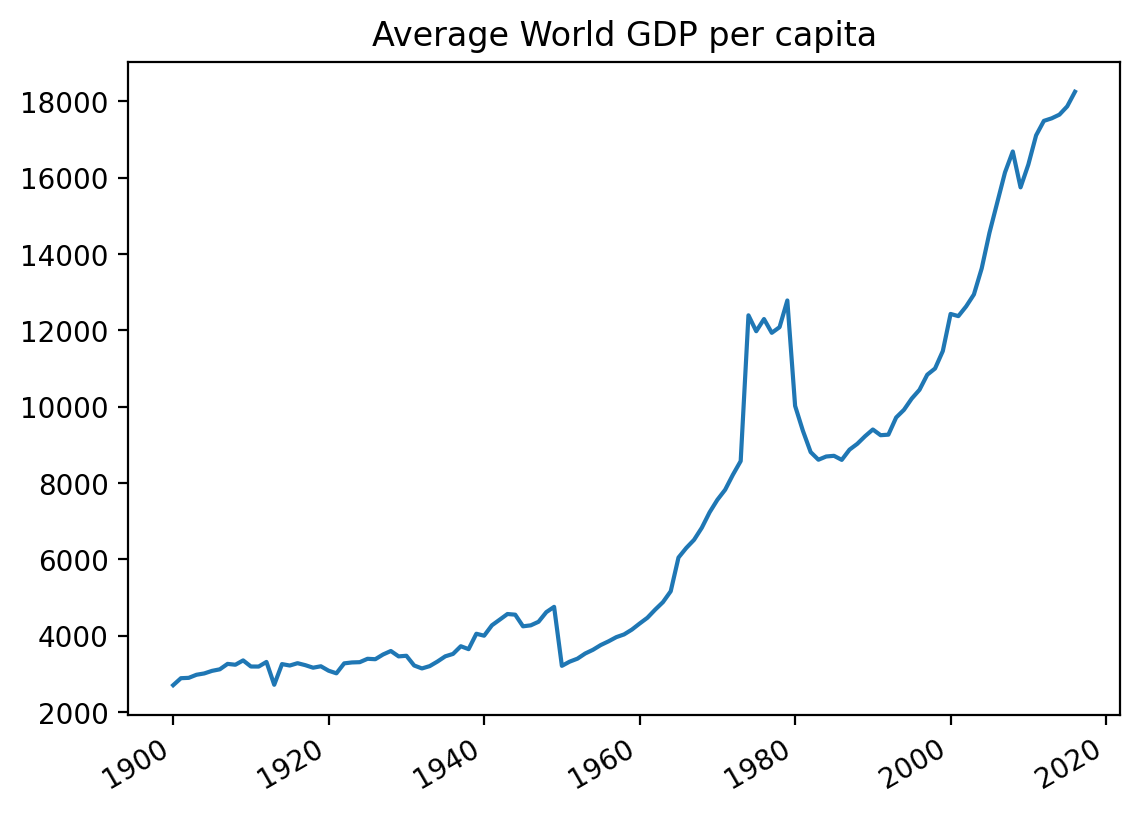

In [23]:
plt.plot(ts_mean['year'], ts_mean['gdp_per_capita'])
plt.title("Average World GDP per capita")
plt.gcf().autofmt_xdate()

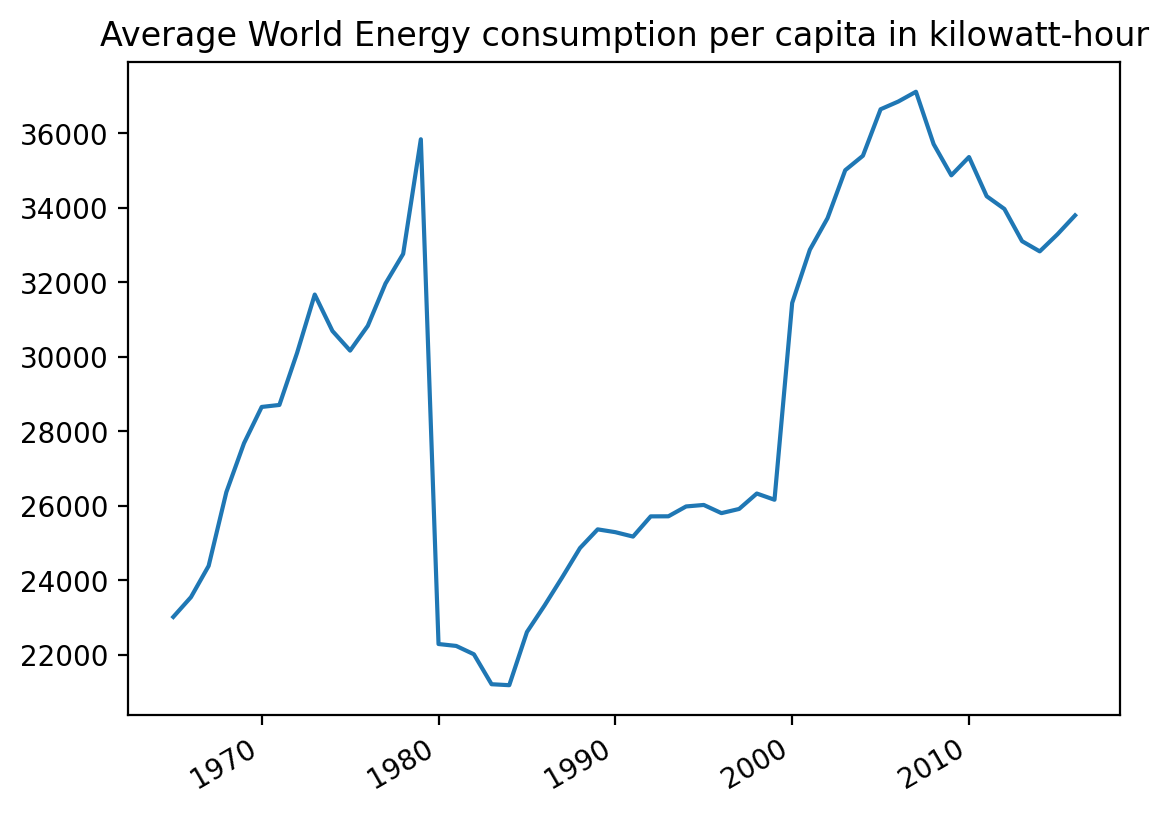

In [28]:
plt.plot(ts_mean['year'], ts_mean['energy_per_capita'])
plt.title("Average World Energy consumption per capita in kilowatt-hour")
plt.gcf().autofmt_xdate()

# Plotting time series by sum()

We have to point out, that "popaltion" variable, differs a lot from the Population got it in a google search. Also, many contries are missing in the data base. Thus, the scale in the plot is wrong but we can see the tendency that is similar to the reality.

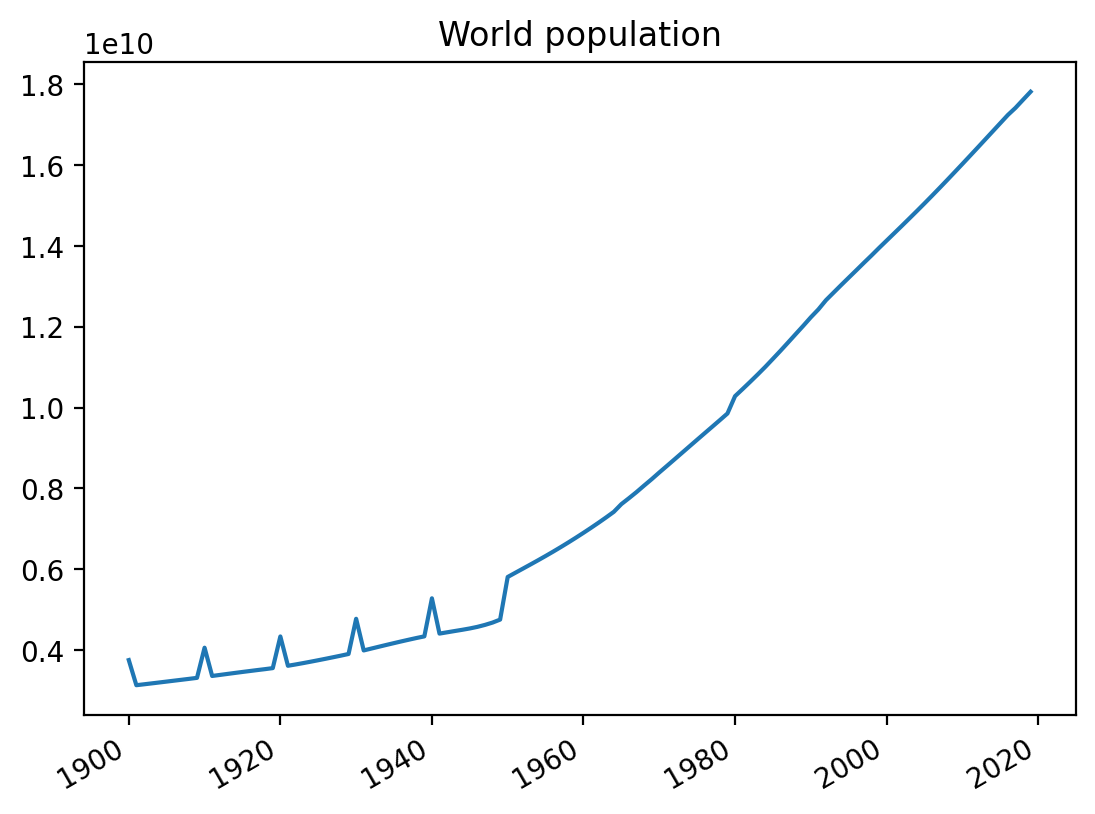

In [34]:
plt.plot(ts_sum['year'].head(ts_sum.shape[0] - 1), ts_sum['population'].head(ts_sum.shape[0] - 1))
plt.title("World population")
plt.gcf().autofmt_xdate()

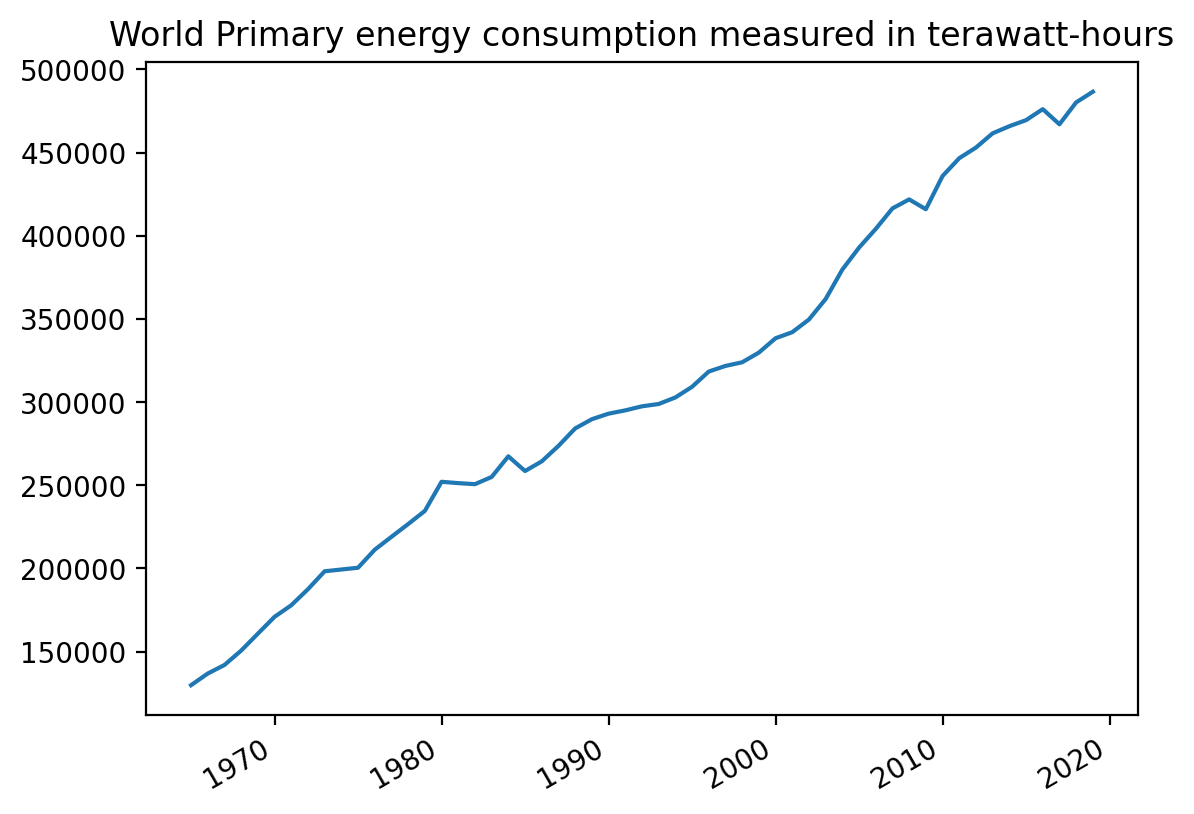

In [85]:
plt.plot(ts_sum.loc[ts_sum.primary_energy_consumption > 0, ['year']], 
         ts_sum.loc[ts_sum.primary_energy_consumption > 0, ['primary_energy_consumption']])
plt.title("World Primary energy consumption measured in terawatt-hours")
plt.gcf().autofmt_xdate()

The big tank on the plot, most likely is due to null data

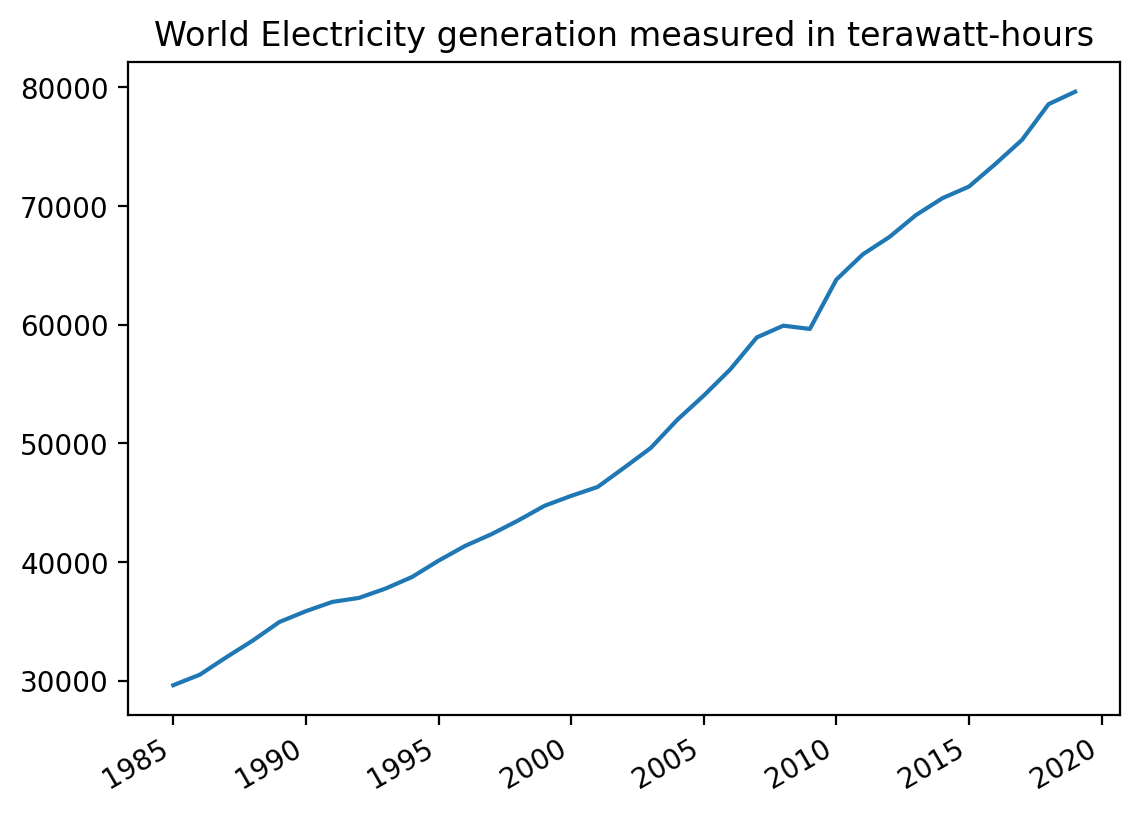

In [94]:
temp_df = ts_sum
temp_df = temp_df.loc[temp_df.electricity_generation > 0, ['year', 'electricity_generation']]
plt.plot(temp_df.year.head(temp_df.shape[0] - 1), 
         temp_df.electricity_generation.head(temp_df.shape[0] - 1))
plt.title("World Electricity generation measured in terawatt-hours")
plt.gcf().autofmt_xdate()

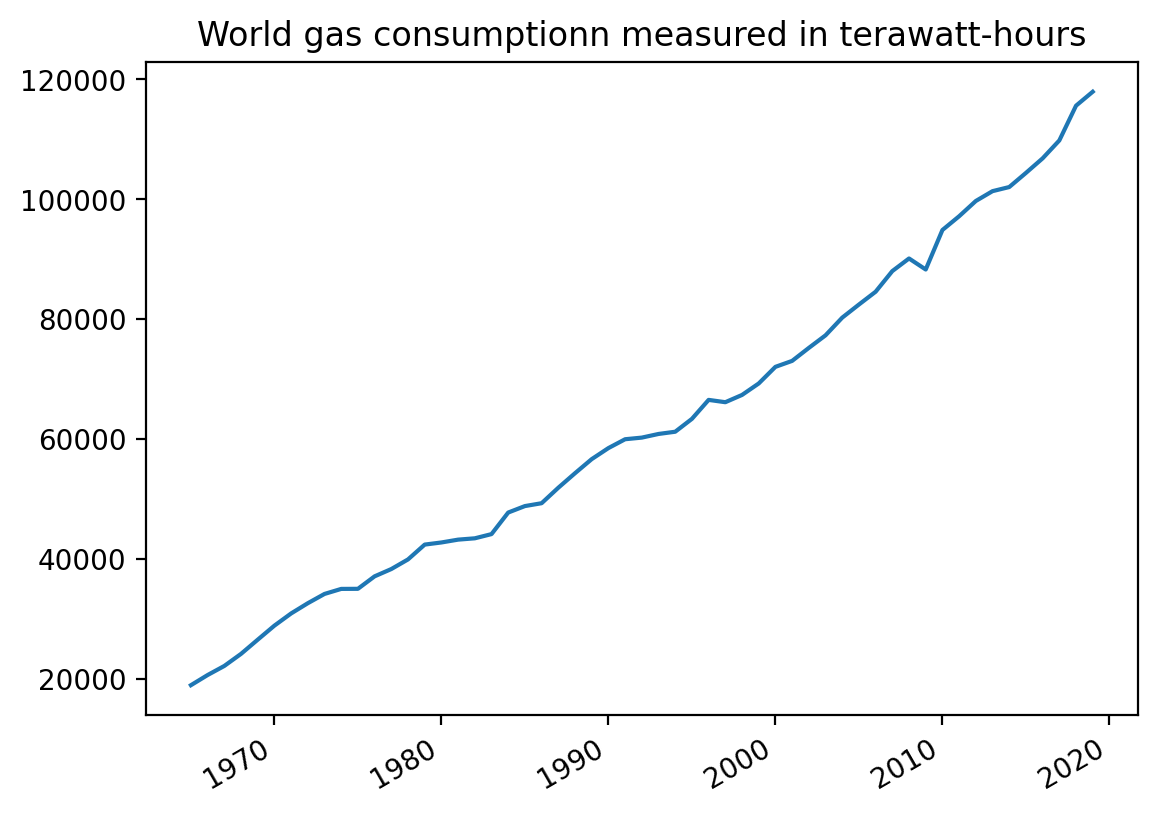

In [95]:
plt.plot(ts_sum.loc[ts_sum.gas_consumption > 0, ['year']], 
         ts_sum.loc[ts_sum.gas_consumption > 0, ['gas_consumption']])
plt.title("World gas consumptionn measured in terawatt-hours")
plt.gcf().autofmt_xdate()

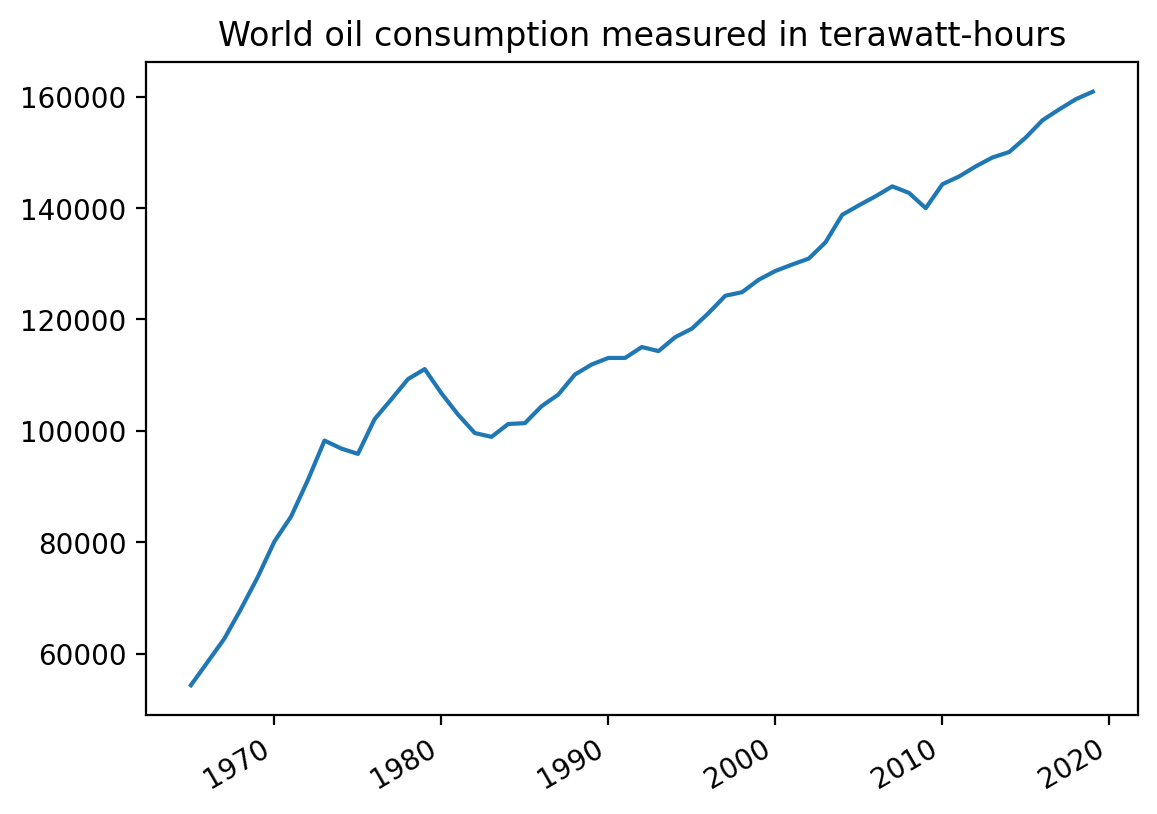

In [96]:

plt.plot(ts_sum.loc[ts_sum.oil_consumption > 0, ['year']], 
         ts_sum.loc[ts_sum.oil_consumption > 0, ['oil_consumption']])
plt.title("World oil consumption measured in terawatt-hours")
plt.gcf().autofmt_xdate()

# Correlations

In [47]:
import seaborn as sns


def corr_plot(df):
    dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
    return dataplot

In [54]:
df_corr = df
df_corr = df_corr[df_corr.columns.difference(['year', 'country', 'gdp', 'gdp_per_capita'])]

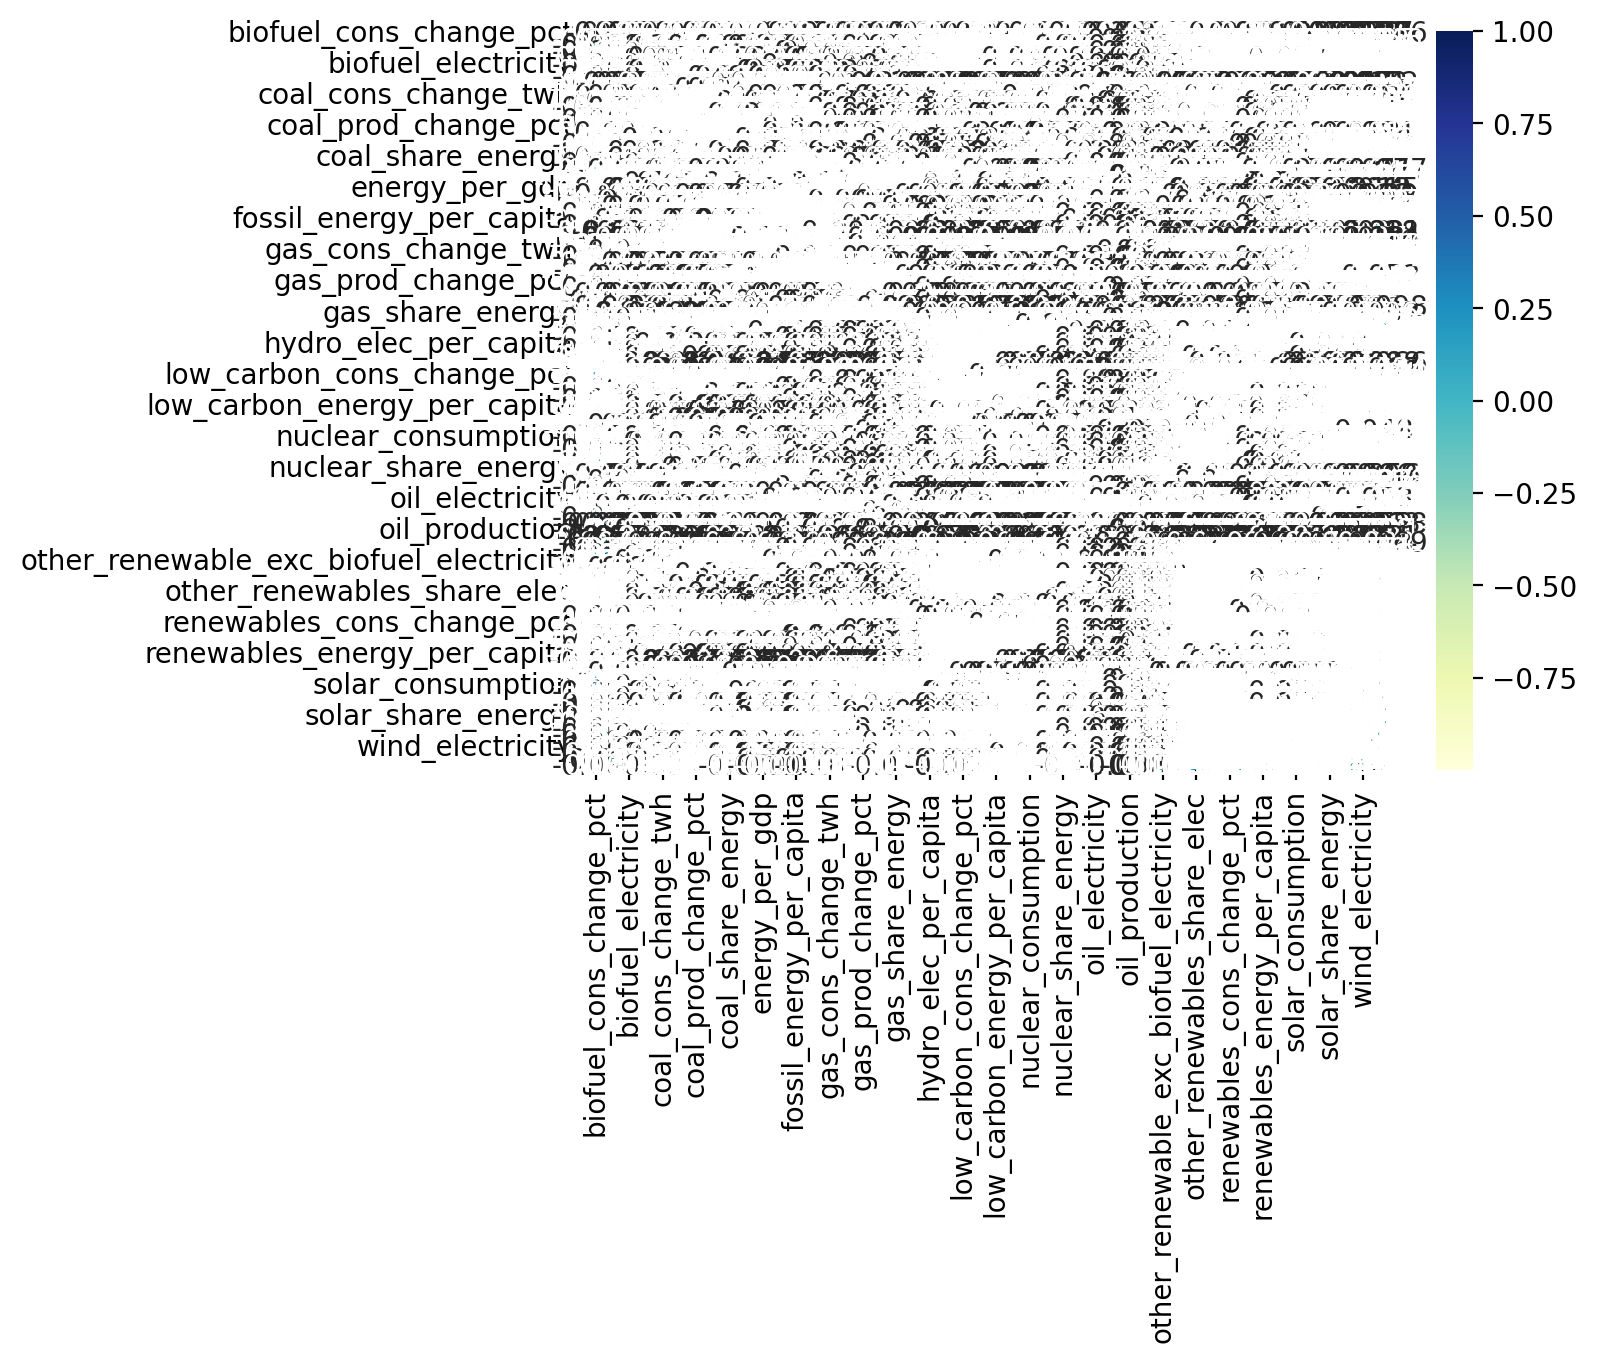

In [55]:
corr_plot_dat = corr_plot(df_corr)
plt.show()

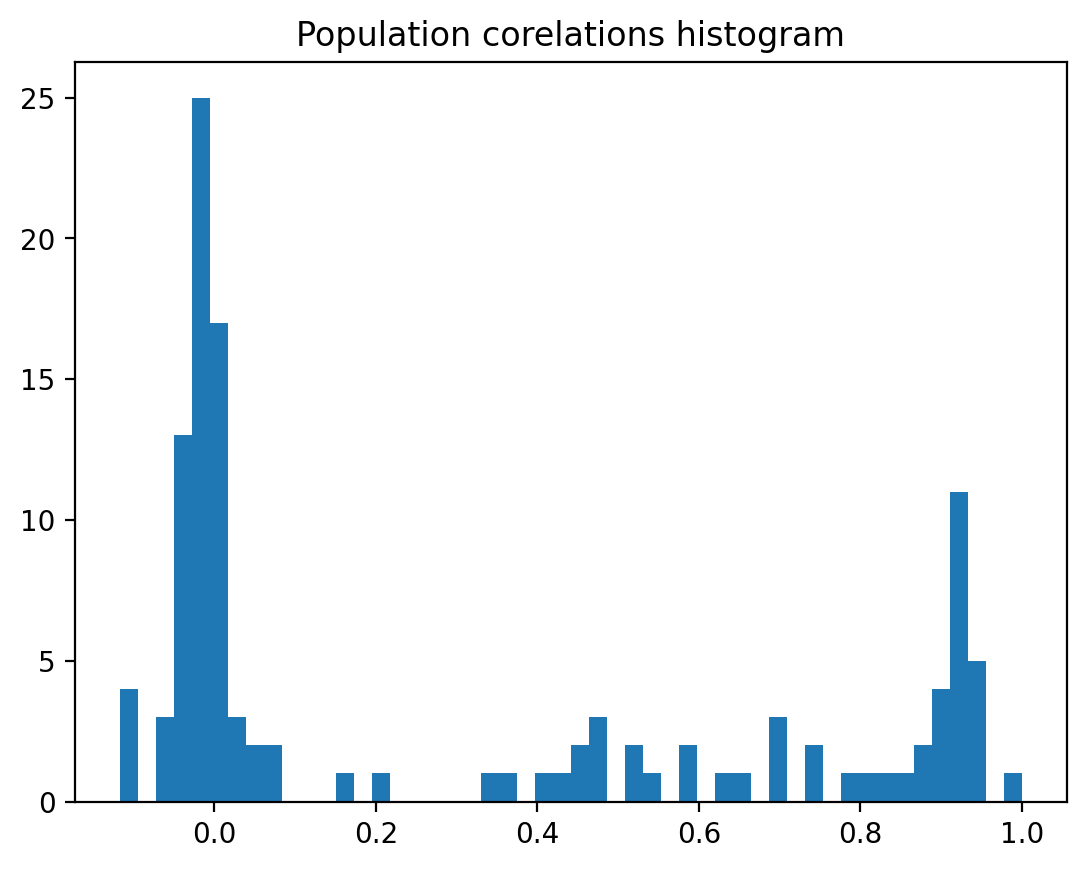

In [57]:
plt.hist(df_corr.corr().population.values, 50)
plt.title("Population corelations histogram")
plt.show()

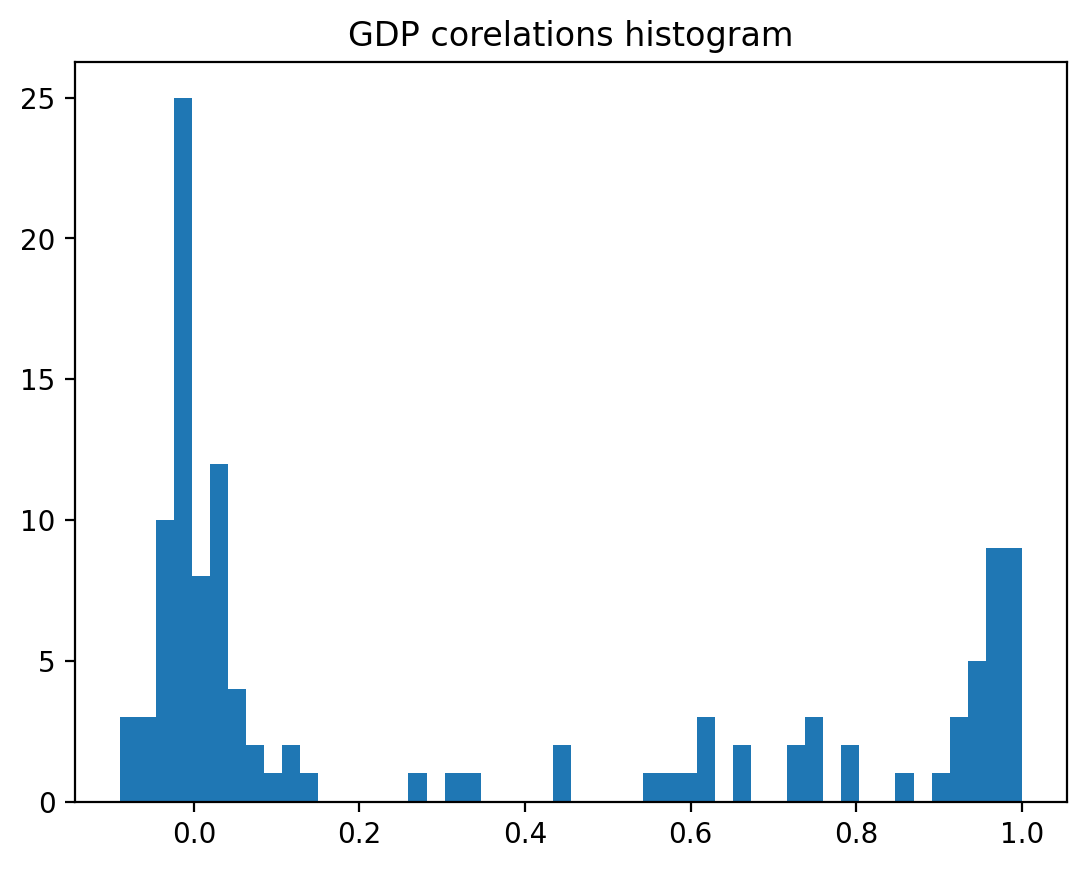

In [110]:
plt.hist(df_corr.corr()['gdp_b'].values, 50)
plt.title("GDP corelations histogram")
plt.show()

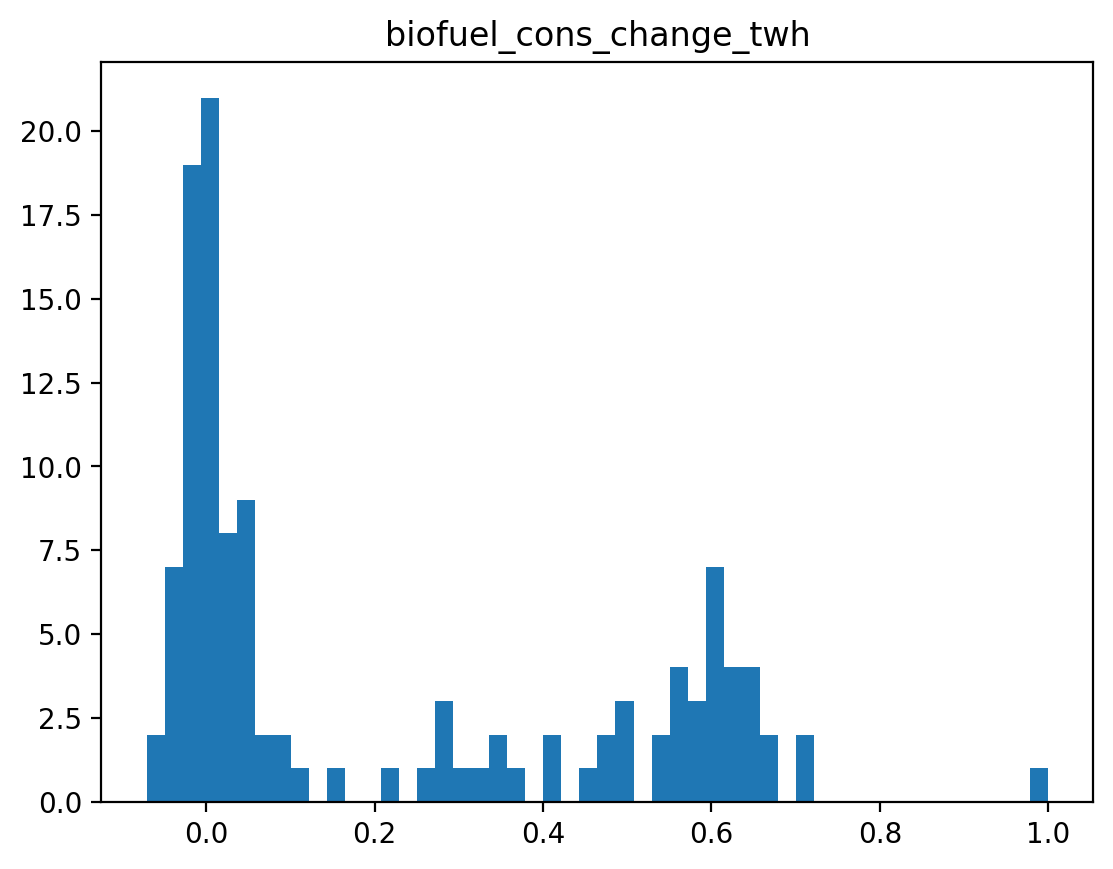

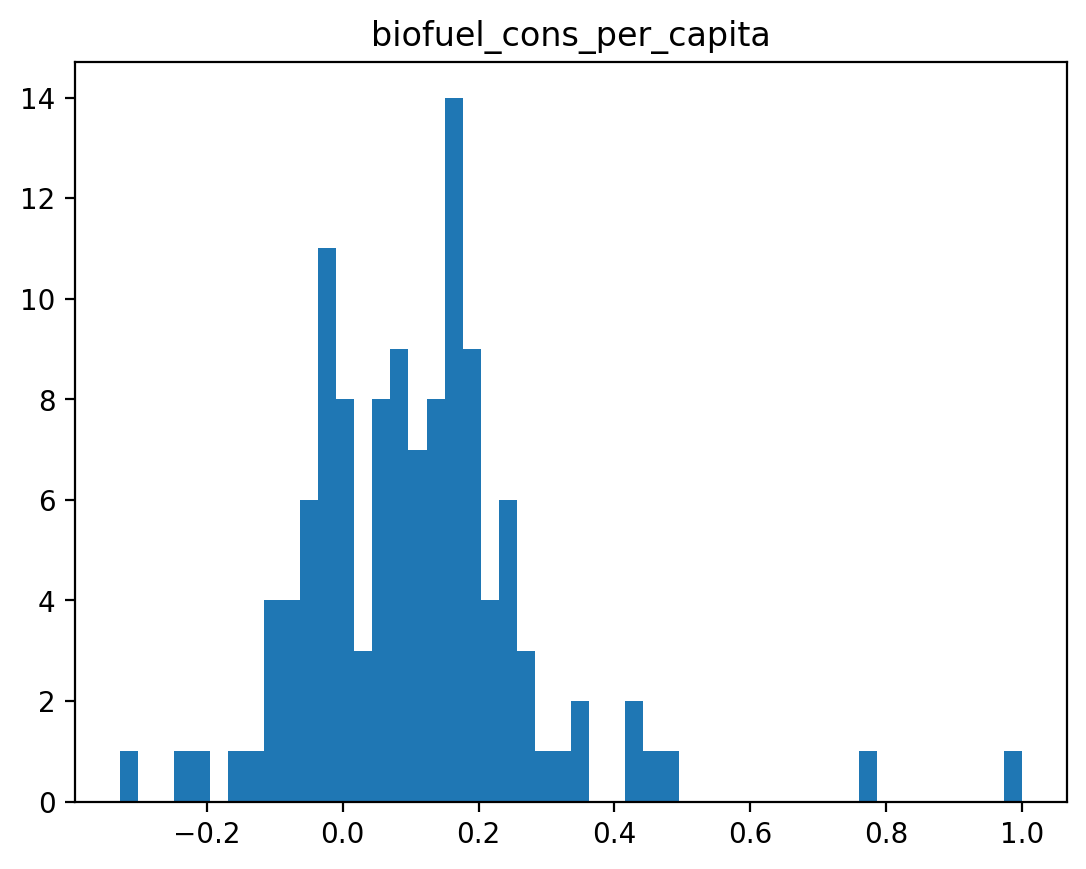

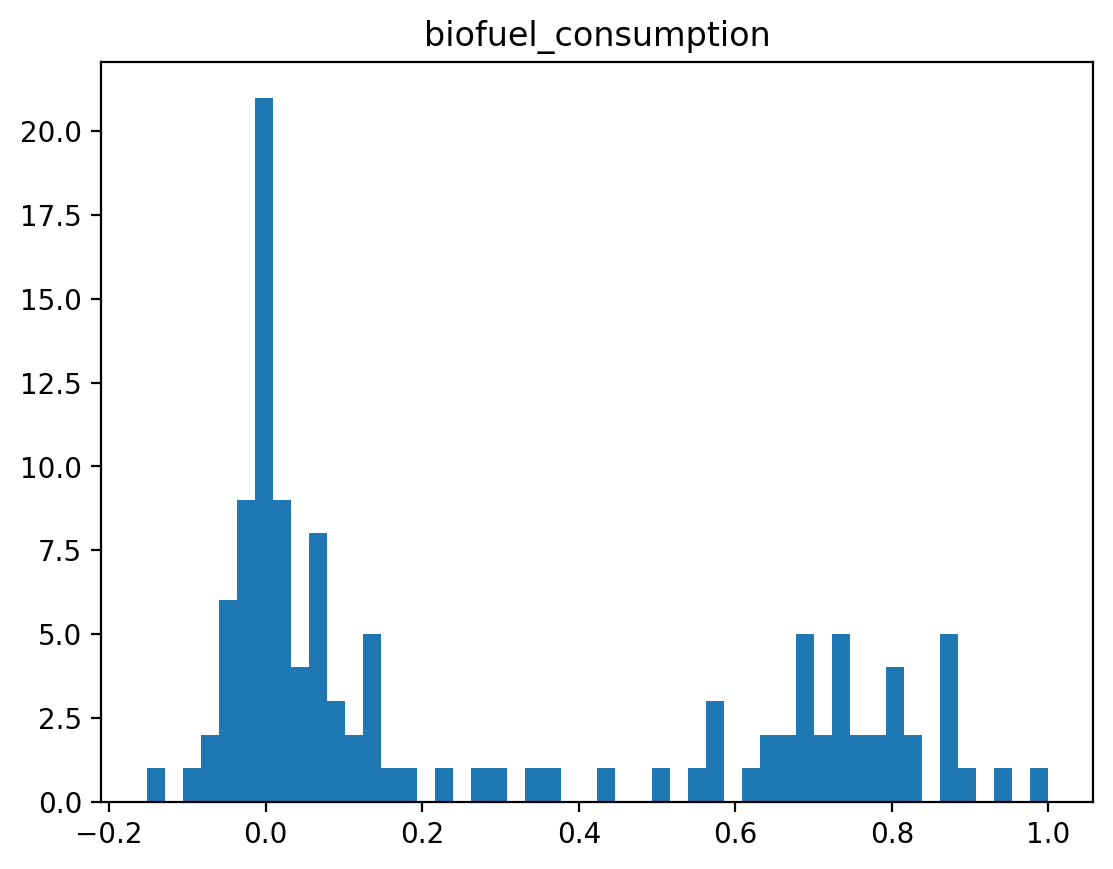

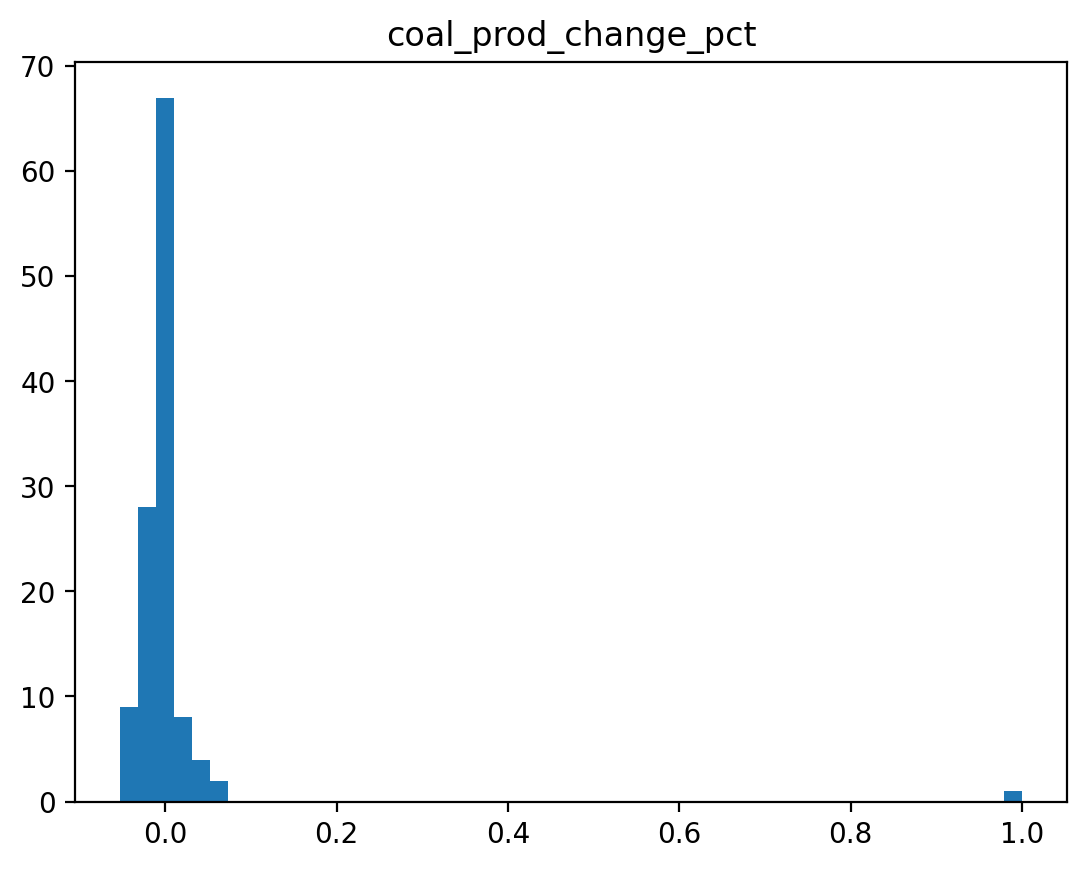

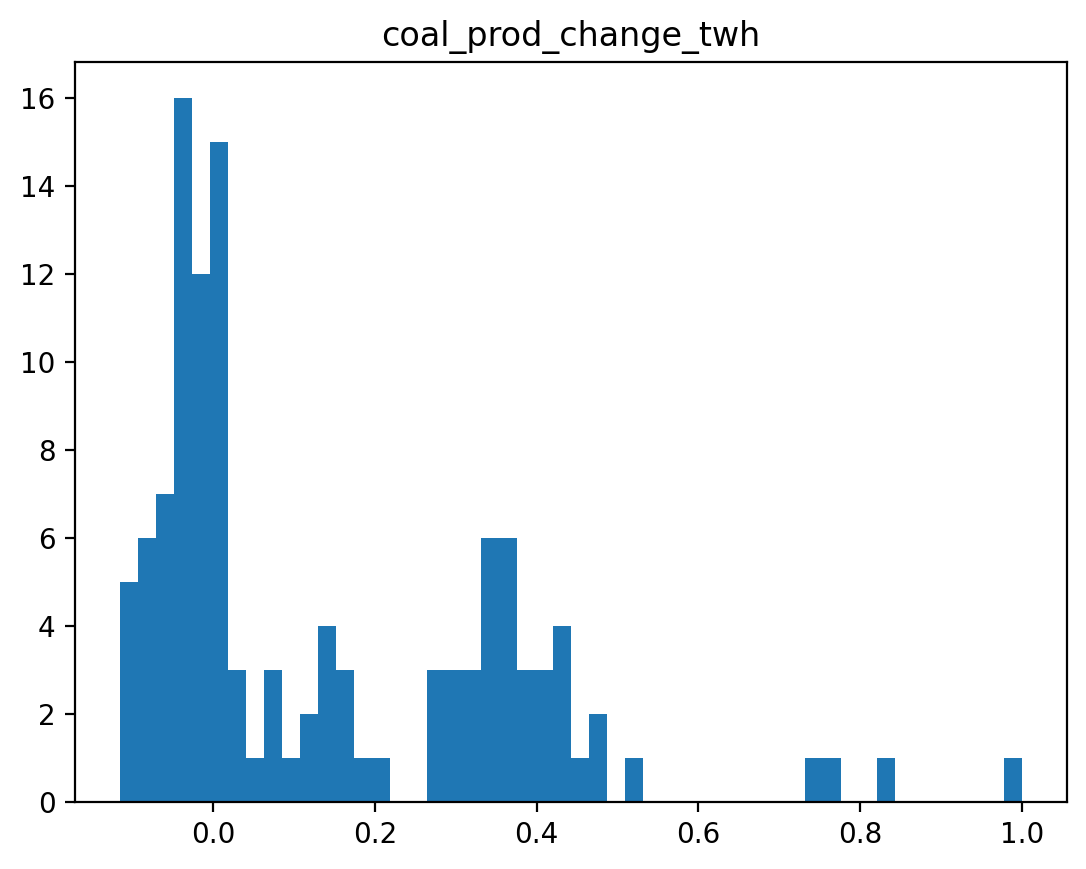

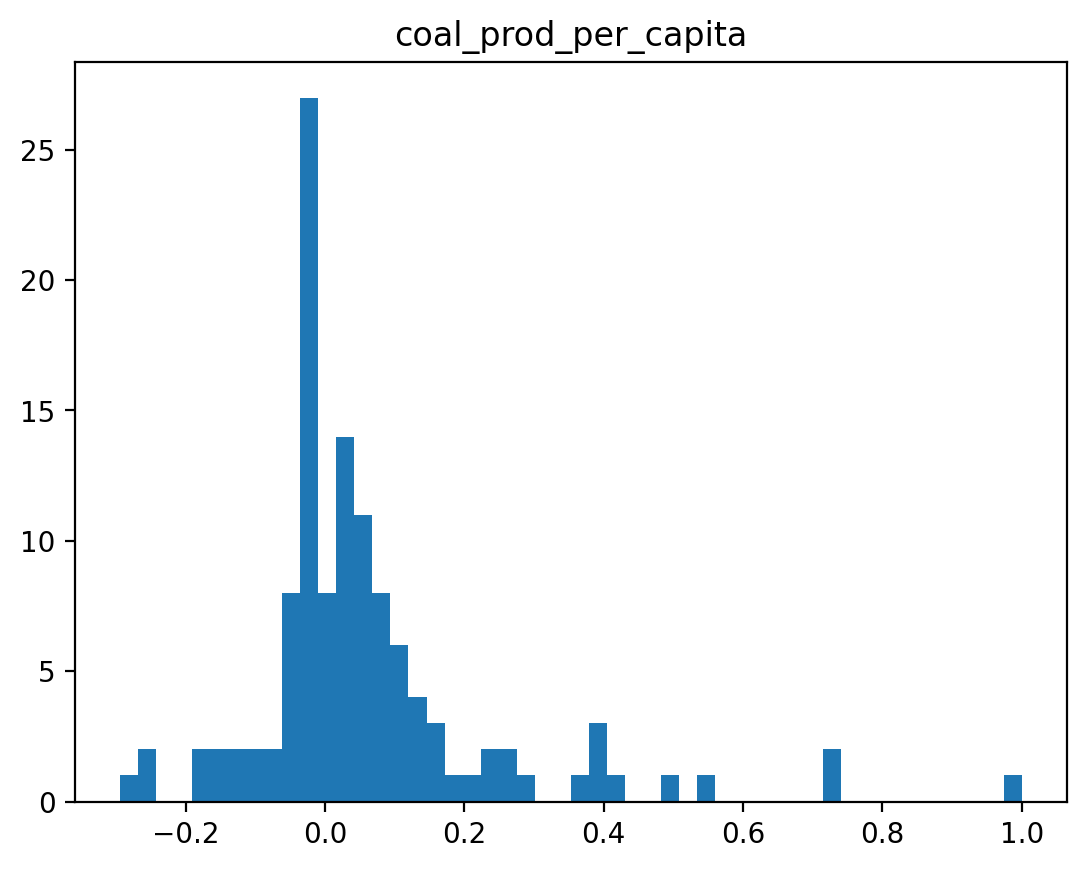

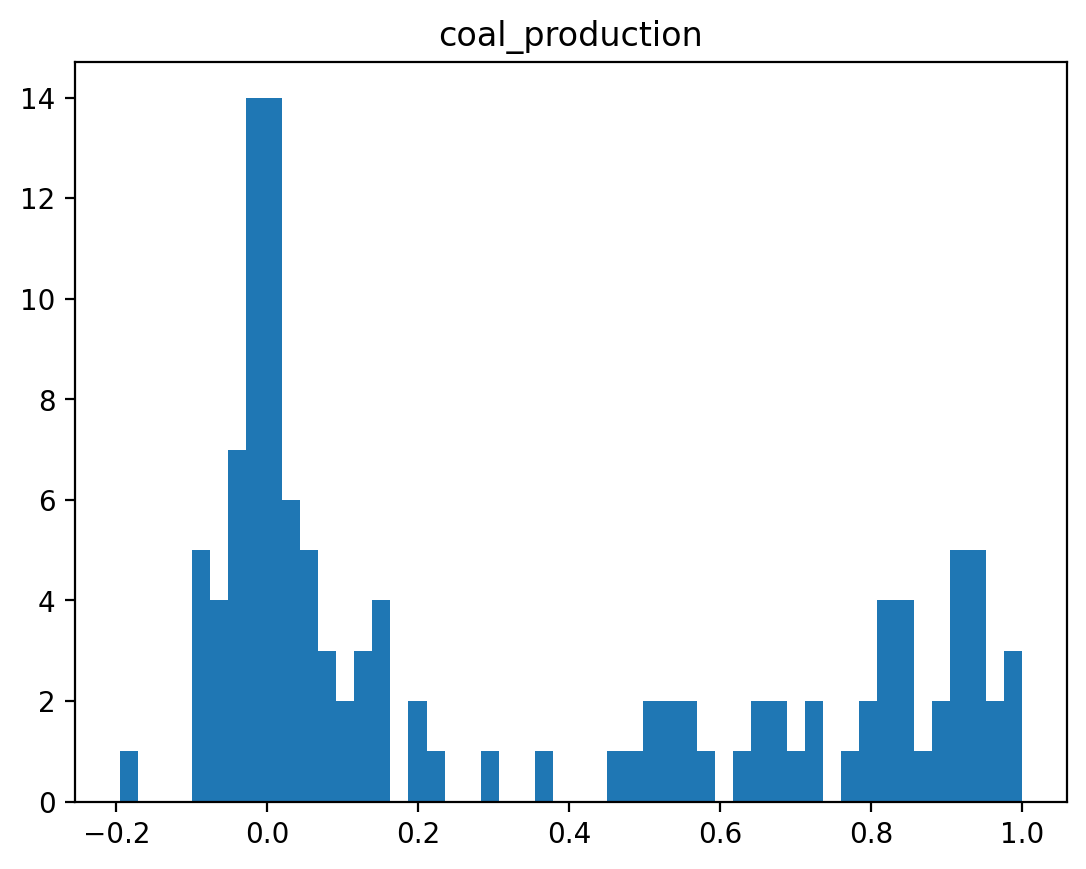

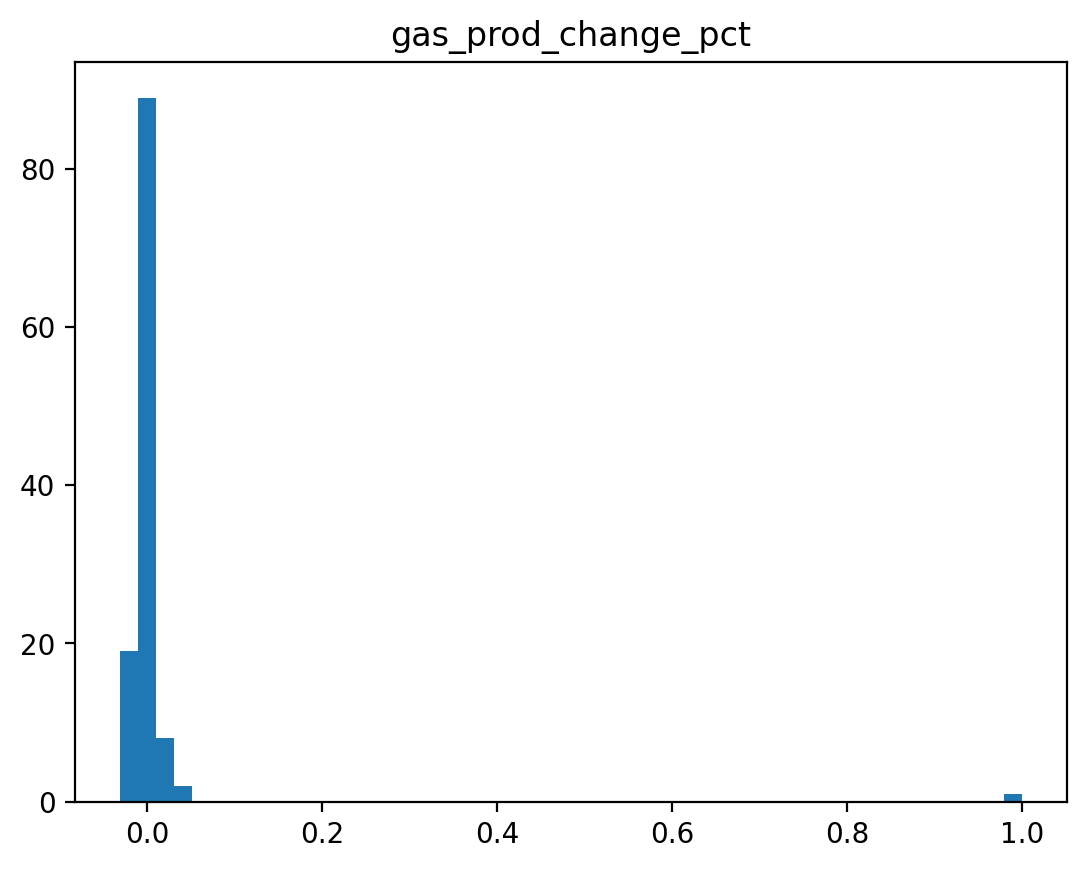

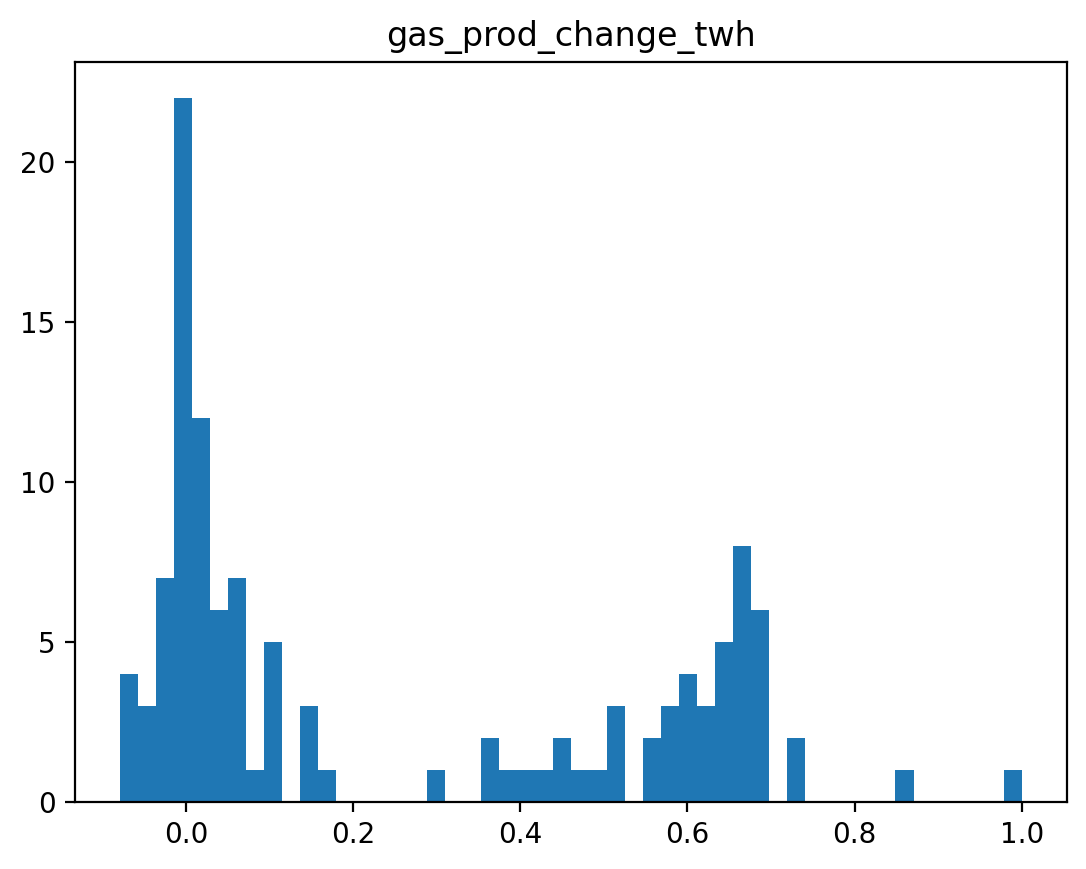

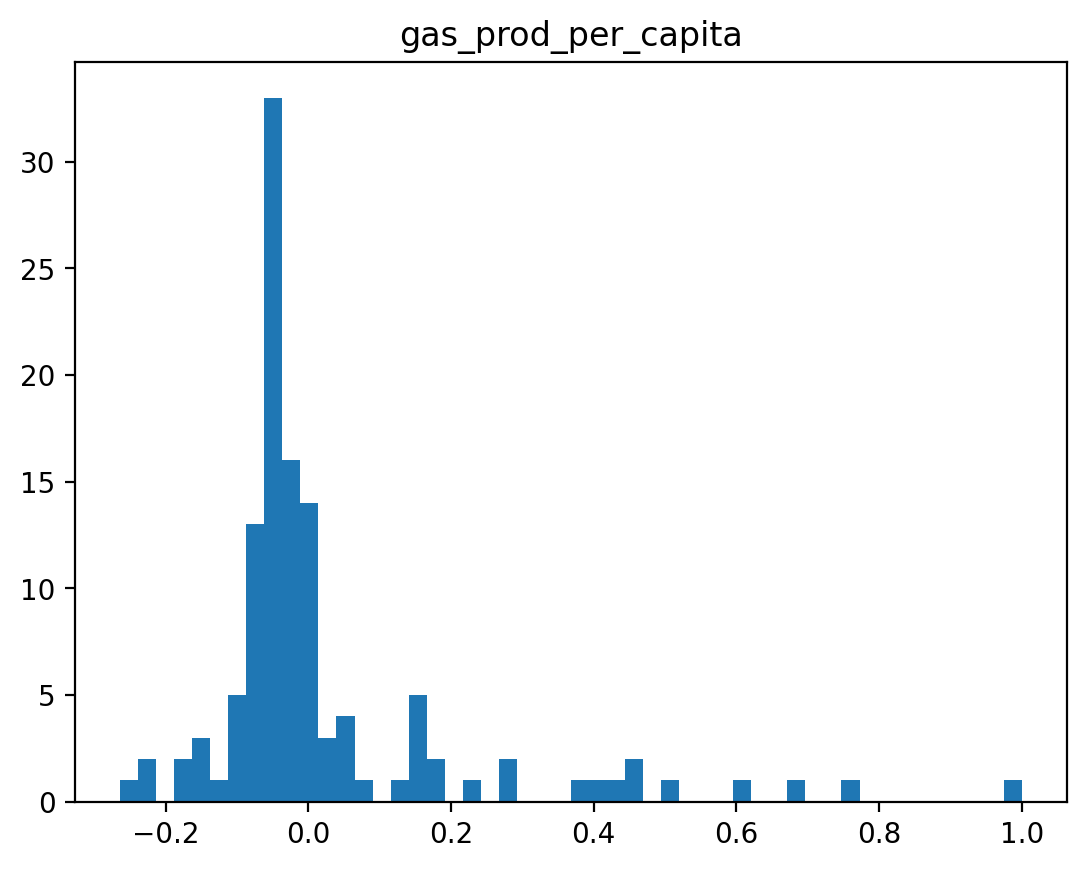

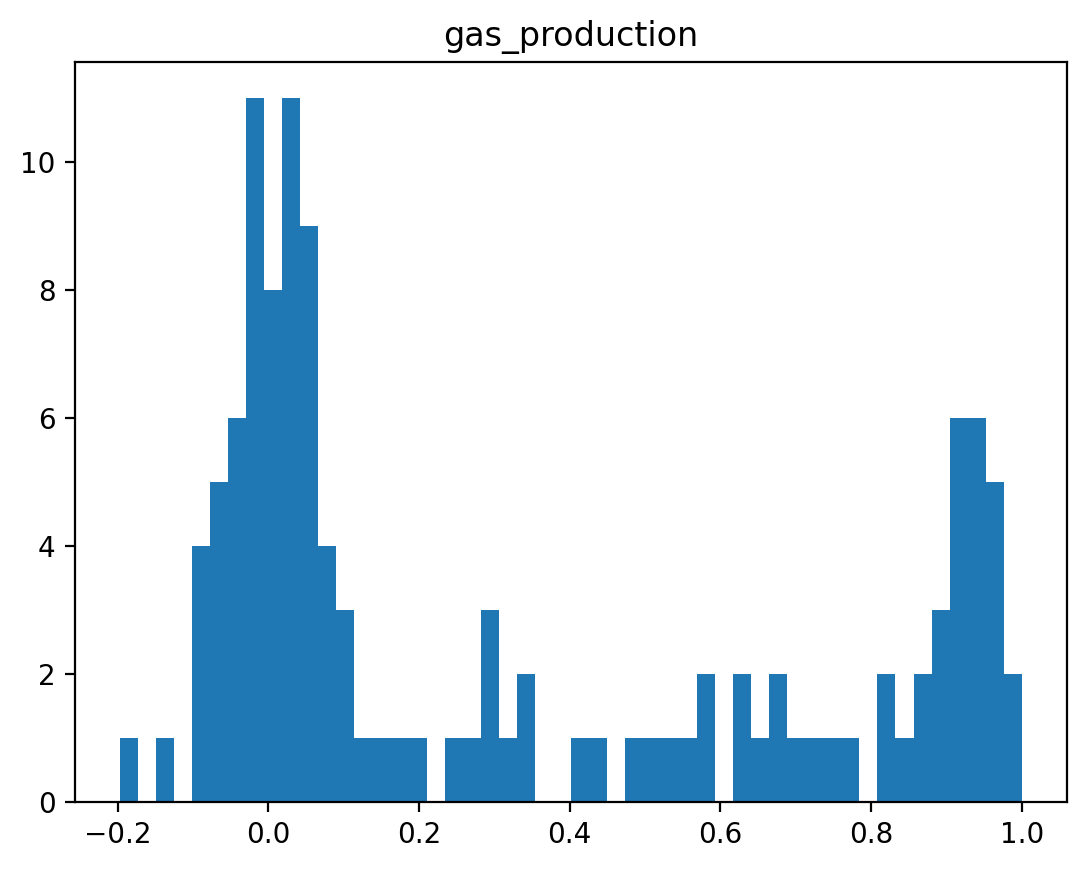

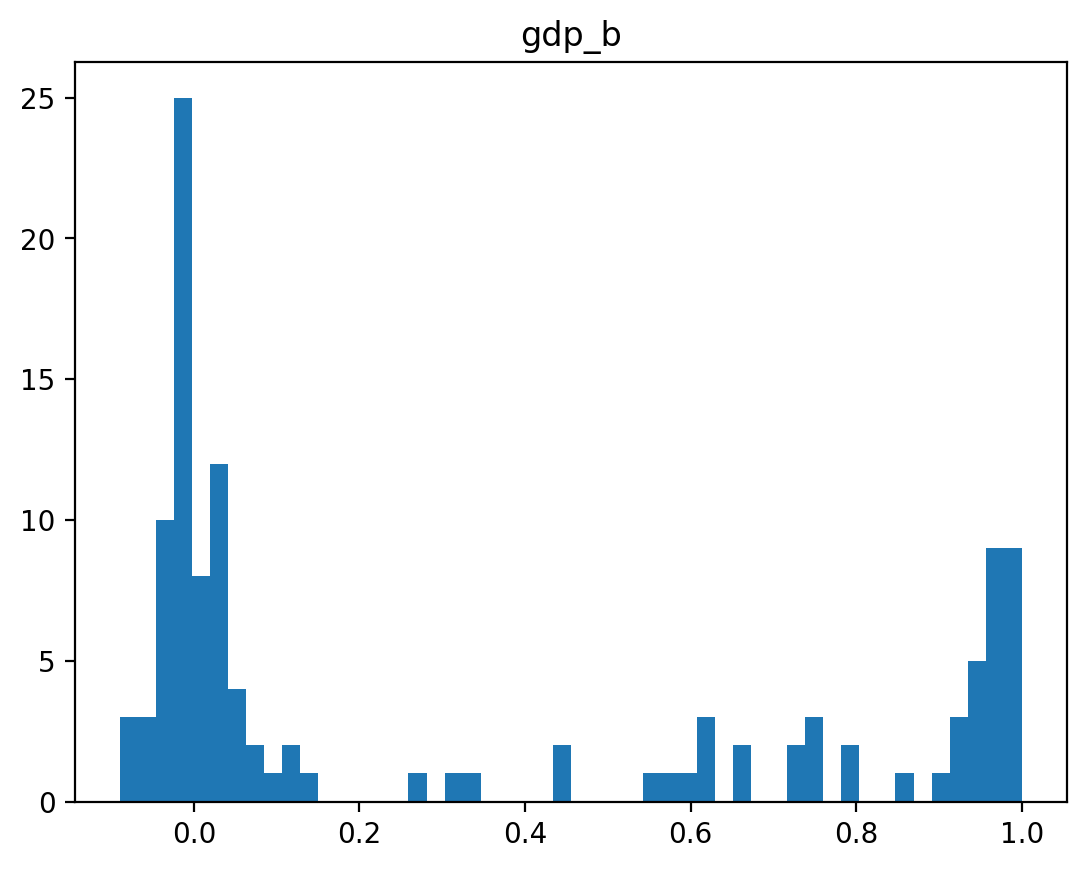

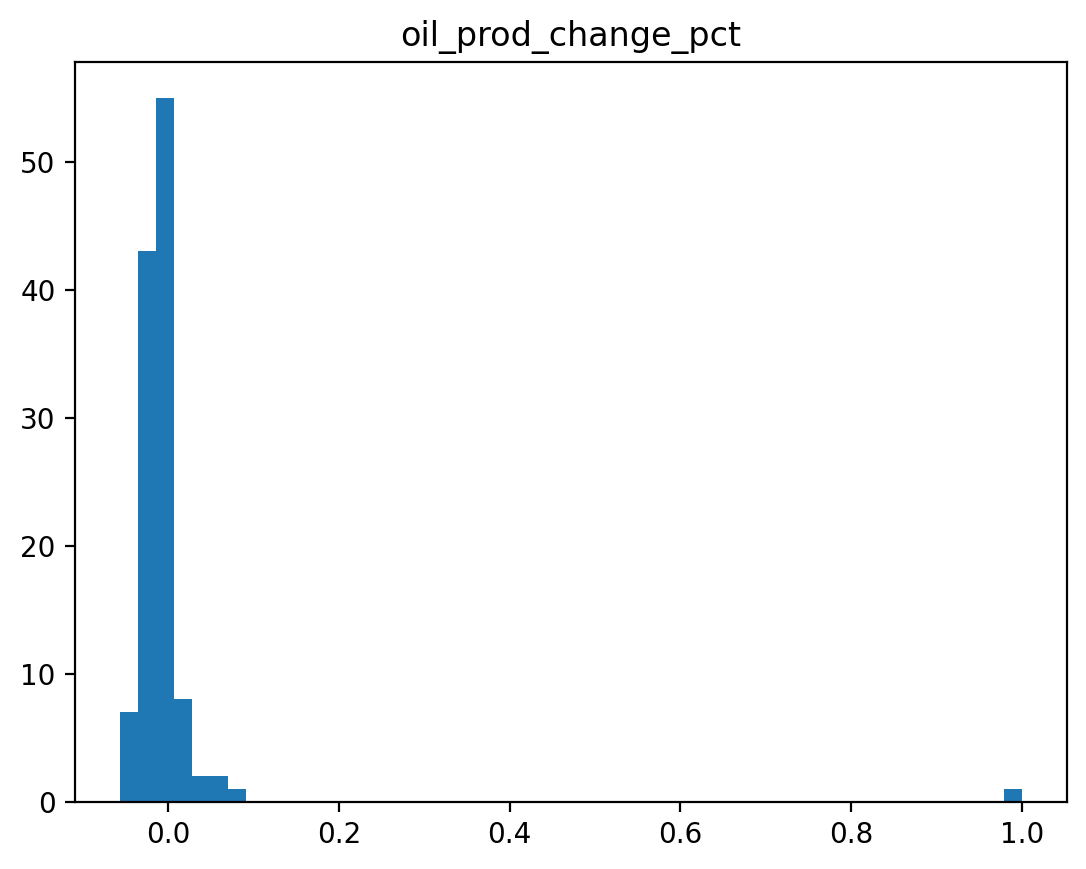

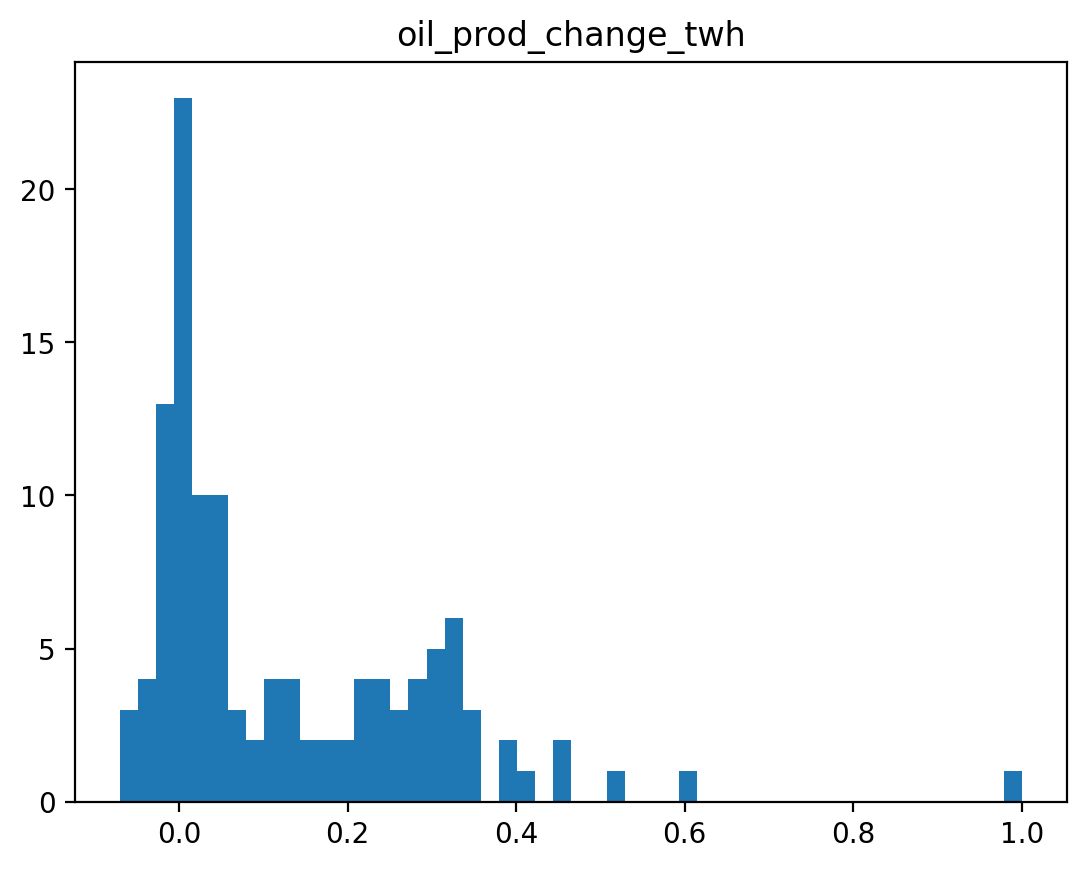

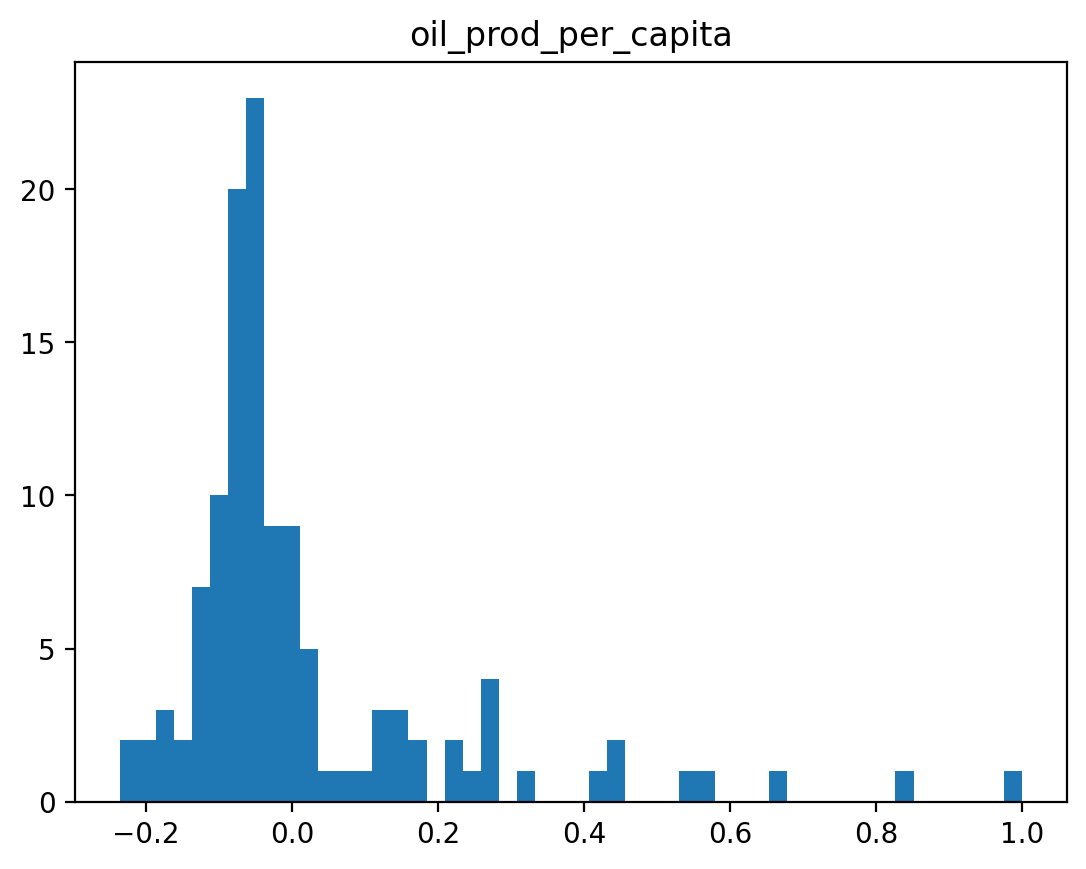

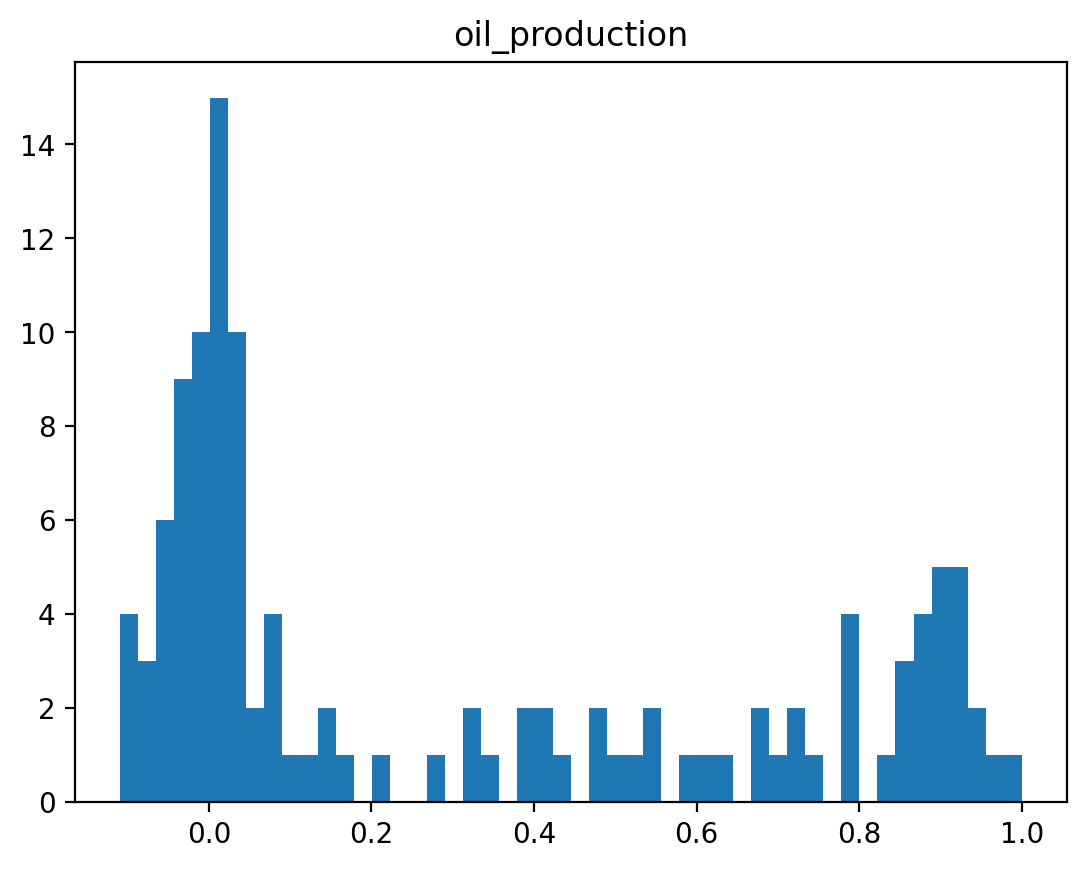

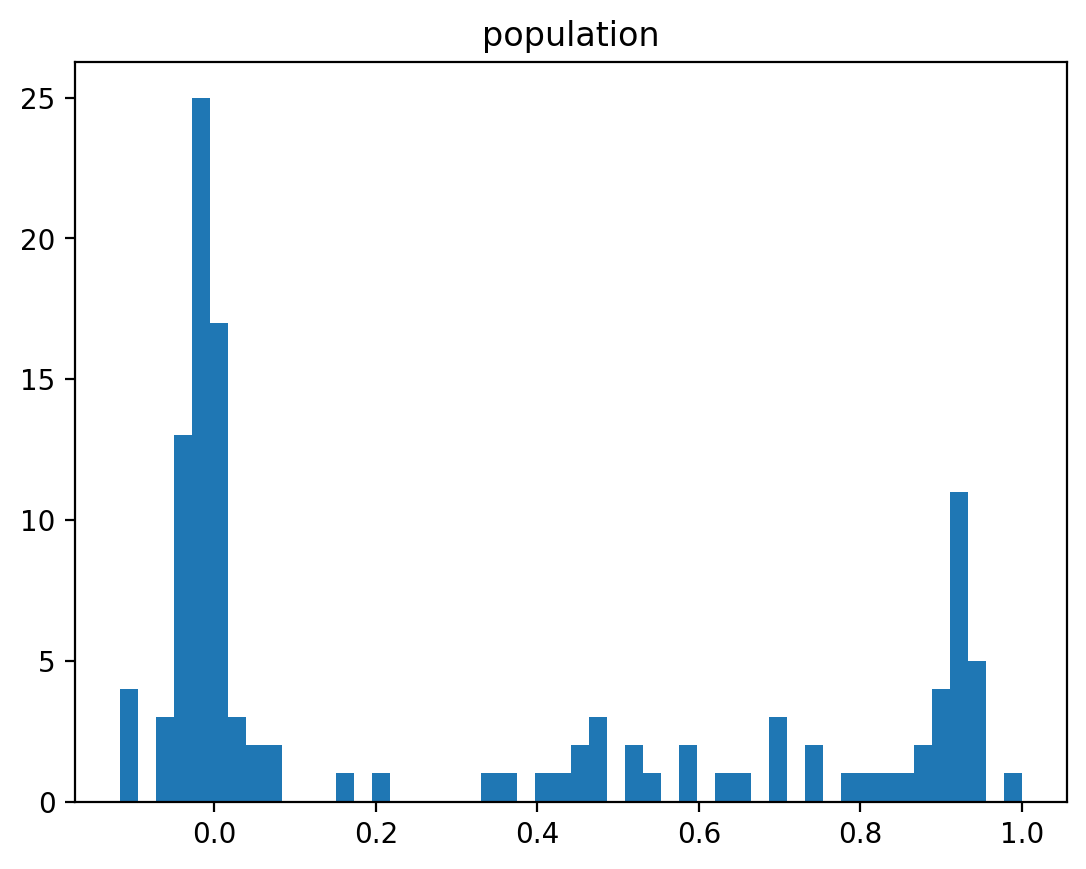

In [117]:
dicts = {}
for i in columns_names:
    dicts[i] = df_corr.corr()[i].values.mean()
    plt.hist(df_corr.corr()[i].values, 50)
    plt.title(i)
    plt.show()

In [118]:
dicts

{'biofuel_cons_change_twh': 0.21373076697102367,
 'biofuel_cons_per_capita': 0.10880780720253518,
 'biofuel_consumption': 0.27800149913442207,
 'coal_prod_change_pct': 0.0018447084554549928,
 'coal_prod_change_twh': 0.13722828163498196,
 'coal_prod_per_capita': 0.06130978178779341,
 'coal_production': 0.3193298104868682,
 'gas_prod_change_pct': 0.005105067535937217,
 'gas_prod_change_twh': 0.2533099499278139,
 'gas_prod_per_capita': 0.02600519209072709,
 'gas_production': 0.32084546212198267,
 'gdp_b': 0.32939946655674024,
 'oil_prod_change_pct': -0.0013470757806280124,
 'oil_prod_change_twh': 0.1274765731749925,
 'oil_prod_per_capita': 0.016180070477475564,
 'oil_production': 0.30312566416708364,
 'population': 0.2960172218706373}

In [119]:
max_key = max(dicts, key=dicts.get)
max_key

'gdp_b'

In [121]:
min_key = min(dicts, key=dicts.get)
min_key

'oil_prod_change_pct'

In [128]:
df_per_capita = df.loc[:, ['gdp_per_capita', 'population',
                      'biofuel_elec_per_capita',
                      'coal_elec_per_capita',
                      'gas_elec_per_capita',
                      'hydro_elec_per_capita',
                      'low_carbon_elec_per_capita',
                      'nuclear_elec_per_capita',
                      'oil_elec_per_capita',
                      'other_renewables_elec_per_capita',
                      'renewables_elec_per_capita',
                      'solar_elec_per_capita',
                      'wind_elec_per_capita']]

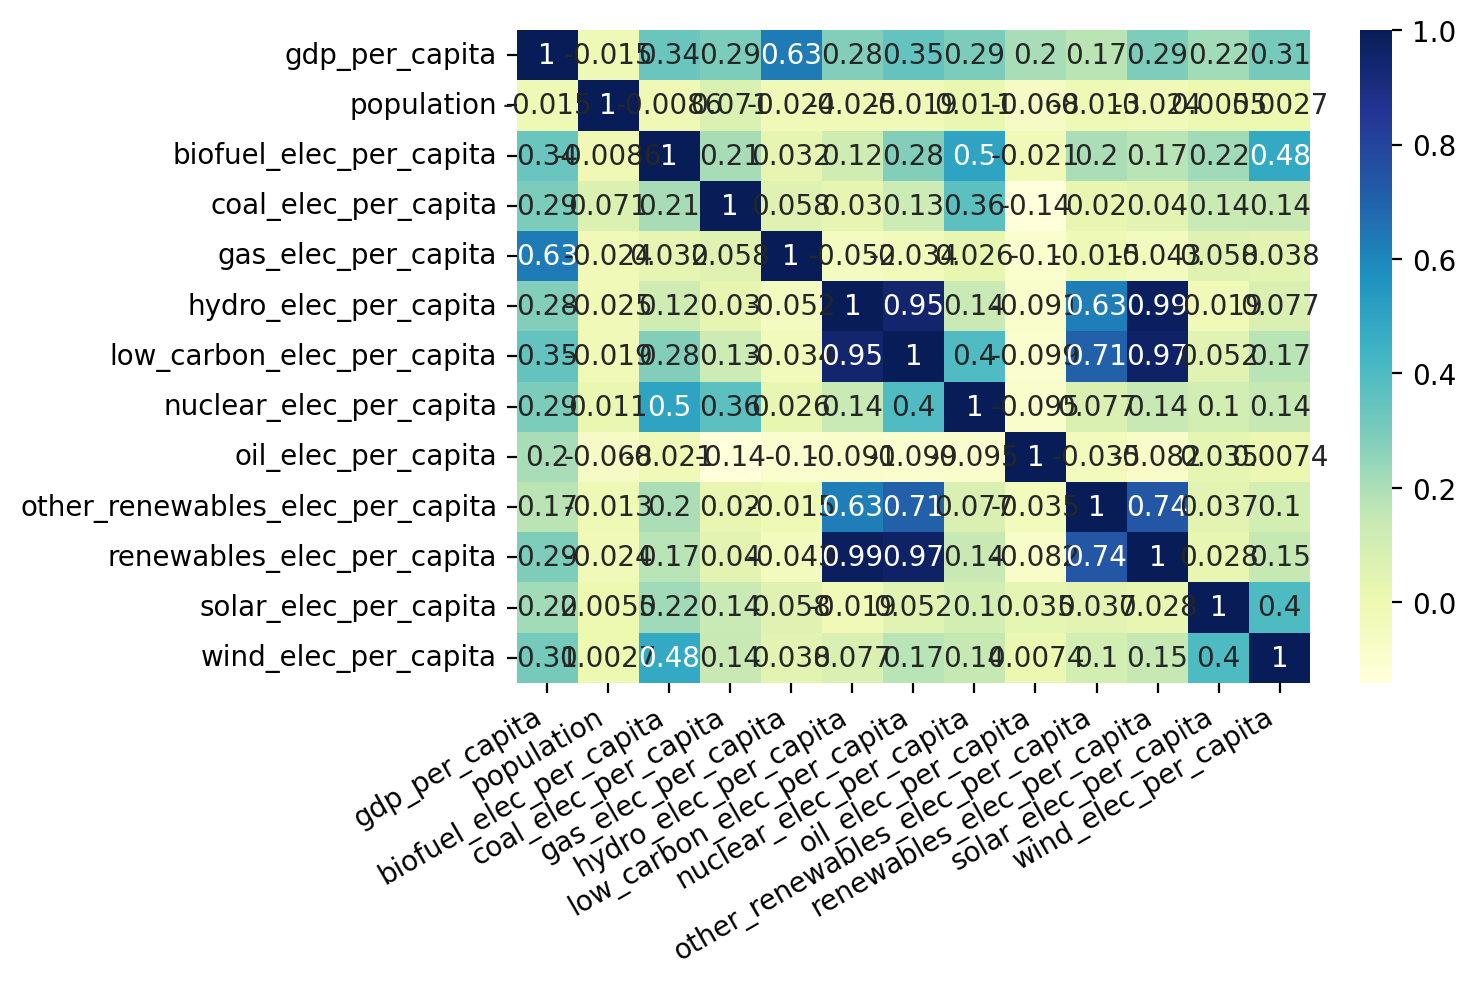

In [130]:
corr_plot_data = corr_plot(df_per_capita)
plt.gcf().autofmt_xdate()
plt.show()

# By  Countries

In [139]:
usa = df.loc[df.loc[:, 'country'] == 'United States', ]
china = df.loc[df.loc[:, 'country'] == 'China', ]
russia = df.loc[df.loc[:, 'country'] == 'Russia', ]
sweden = df.loc[df.loc[:, 'country'] == 'Sweden', ]
singapore = df.loc[df.loc[:, 'country'] == 'Singapore', ]
switzerland = df.loc[df.loc[:, 'country'] == 'Switzerland', ]

## USA

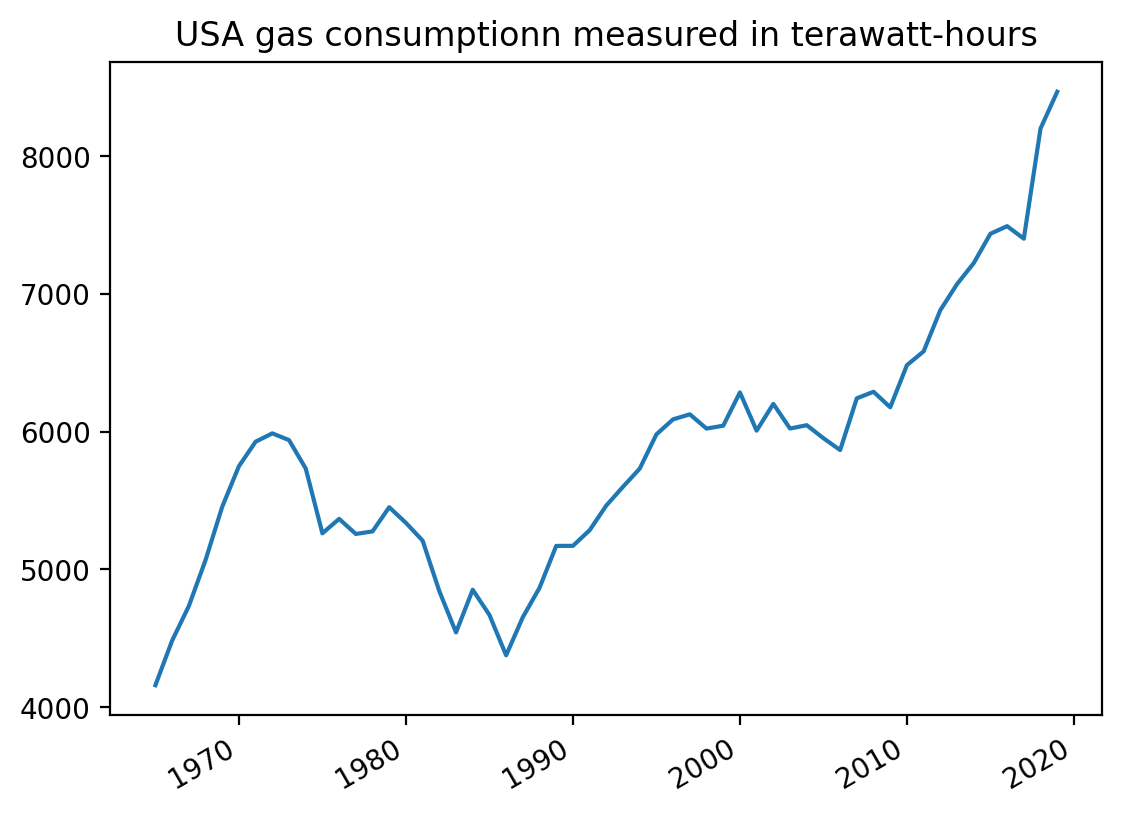

In [131]:
plt.plot(usa.year, usa.gas_consumption)
plt.title("USA gas consumptionn measured in terawatt-hours")
plt.gcf().autofmt_xdate()
plt.show()

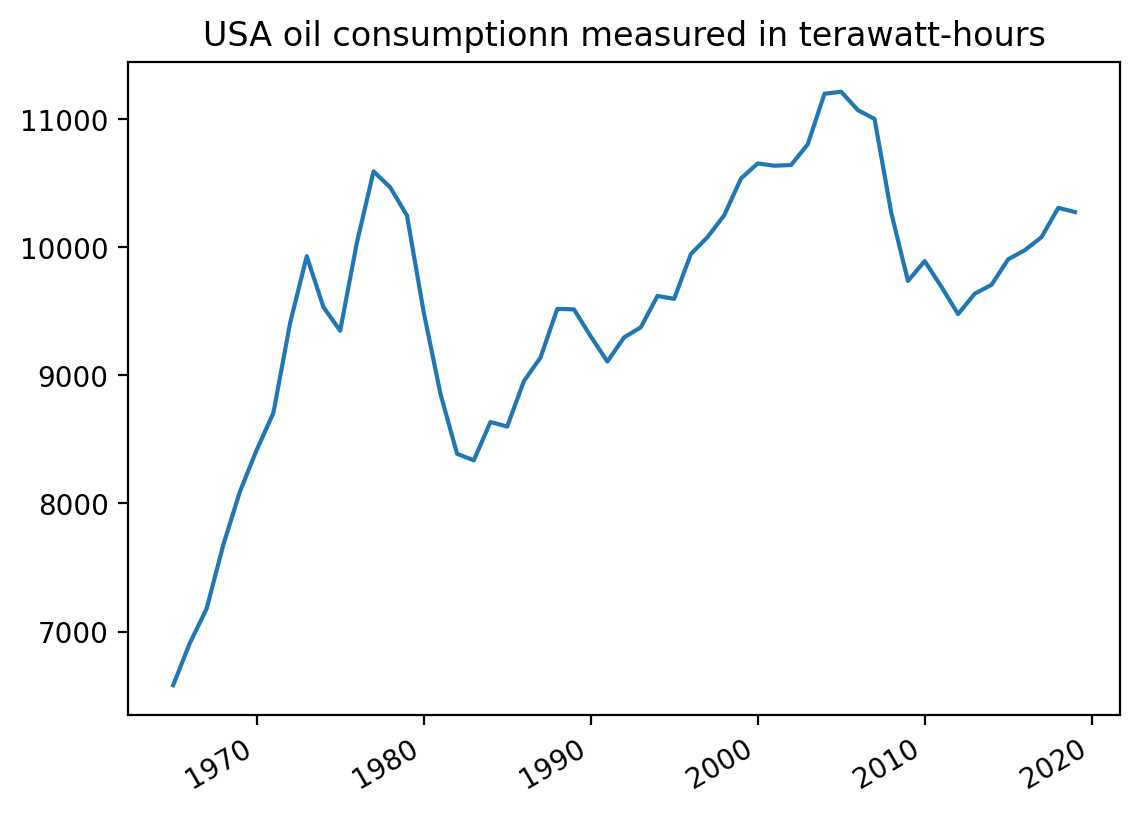

In [132]:
plt.plot(usa.year, usa.oil_consumption)
plt.title("USA oil consumptionn measured in terawatt-hours")
plt.gcf().autofmt_xdate()
plt.show()

## China

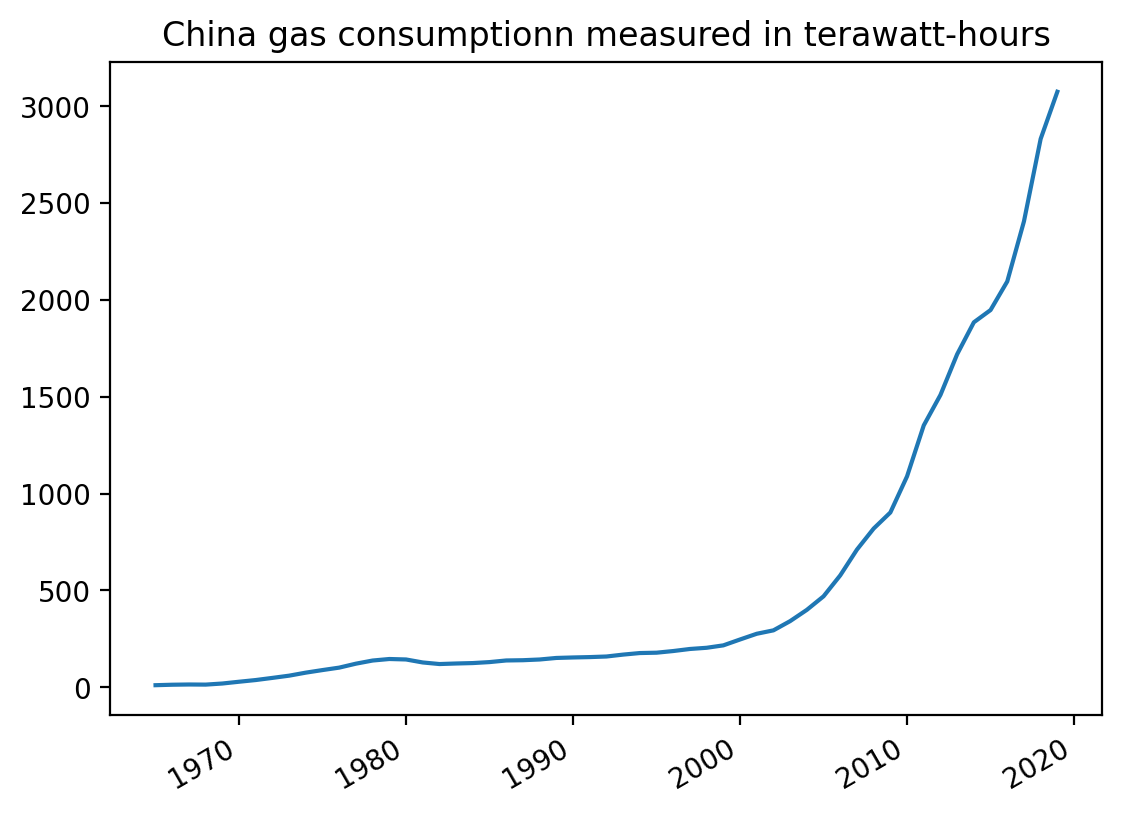

In [133]:
plt.plot(china.year, china.gas_consumption)
plt.title("China gas consumptionn measured in terawatt-hours")
plt.gcf().autofmt_xdate()
plt.show()

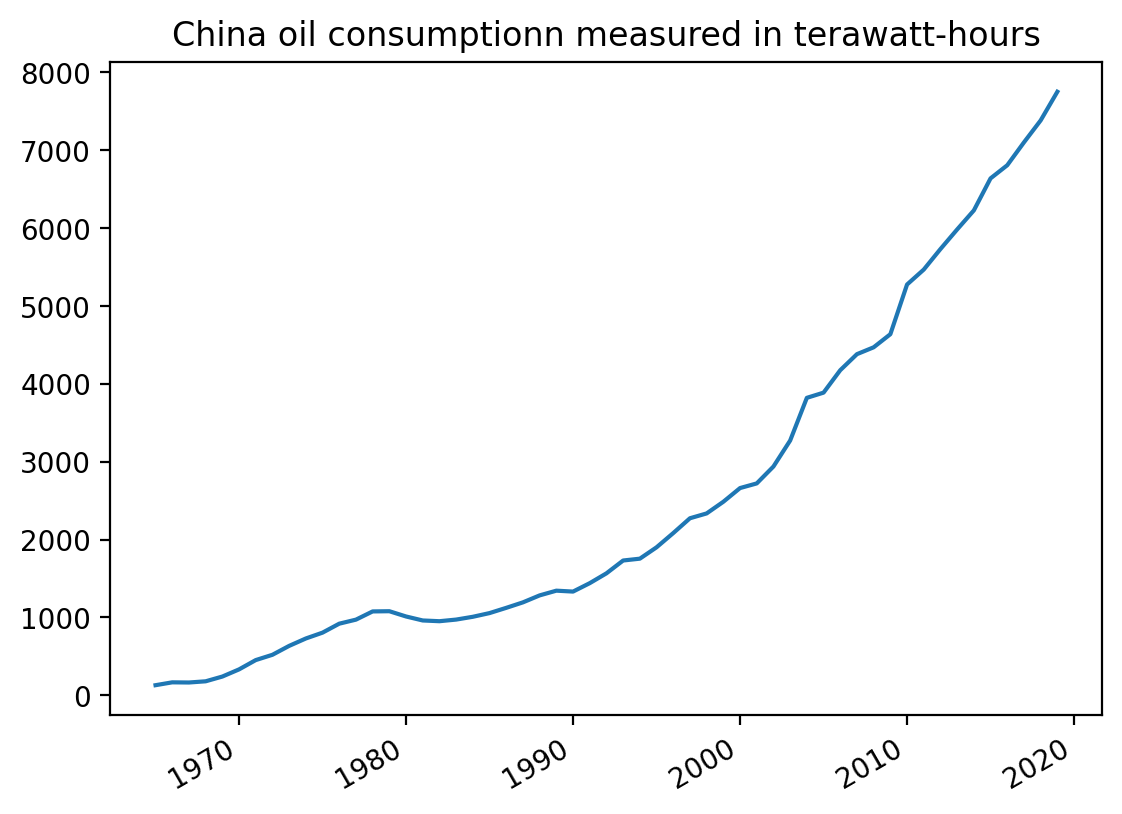

In [134]:
plt.plot(china.year, china.oil_consumption)
plt.title("China oil consumptionn measured in terawatt-hours")
plt.gcf().autofmt_xdate()
plt.show()

## Russia

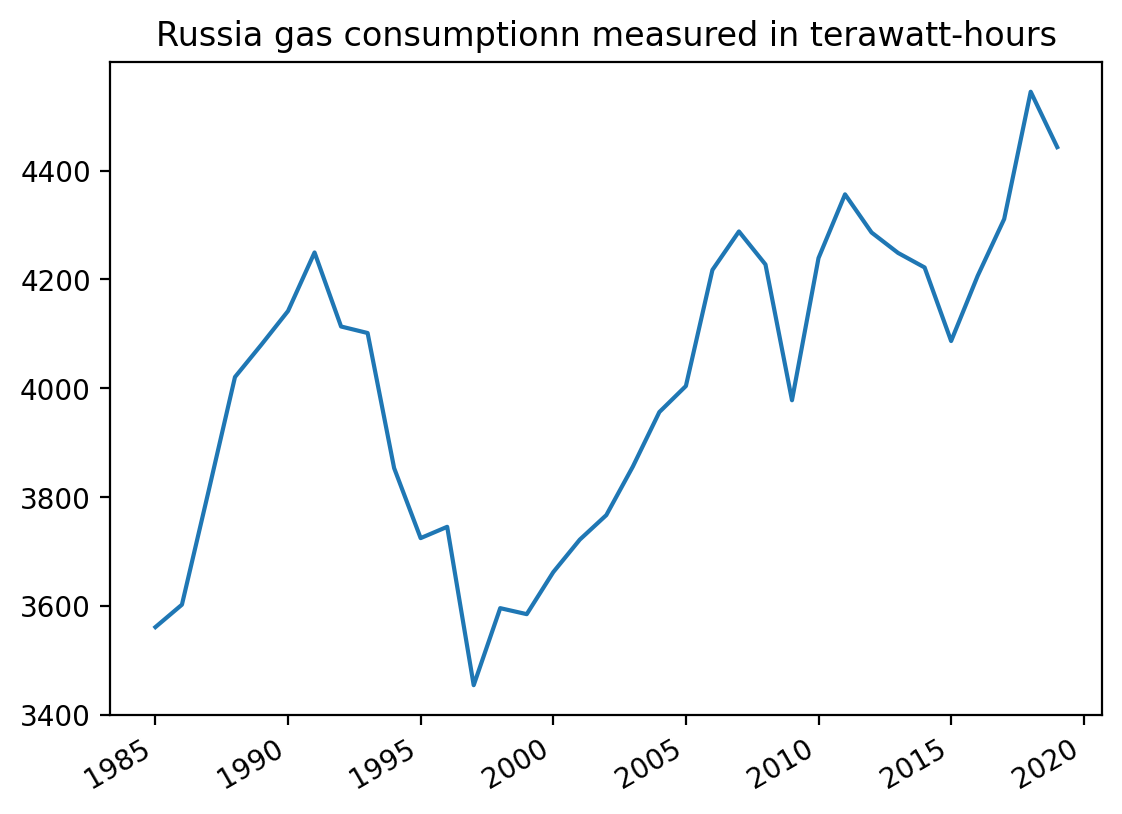

In [135]:
plt.plot(russia.year, russia.gas_consumption)
plt.title("Russia gas consumptionn measured in terawatt-hours")
plt.gcf().autofmt_xdate()
plt.show()

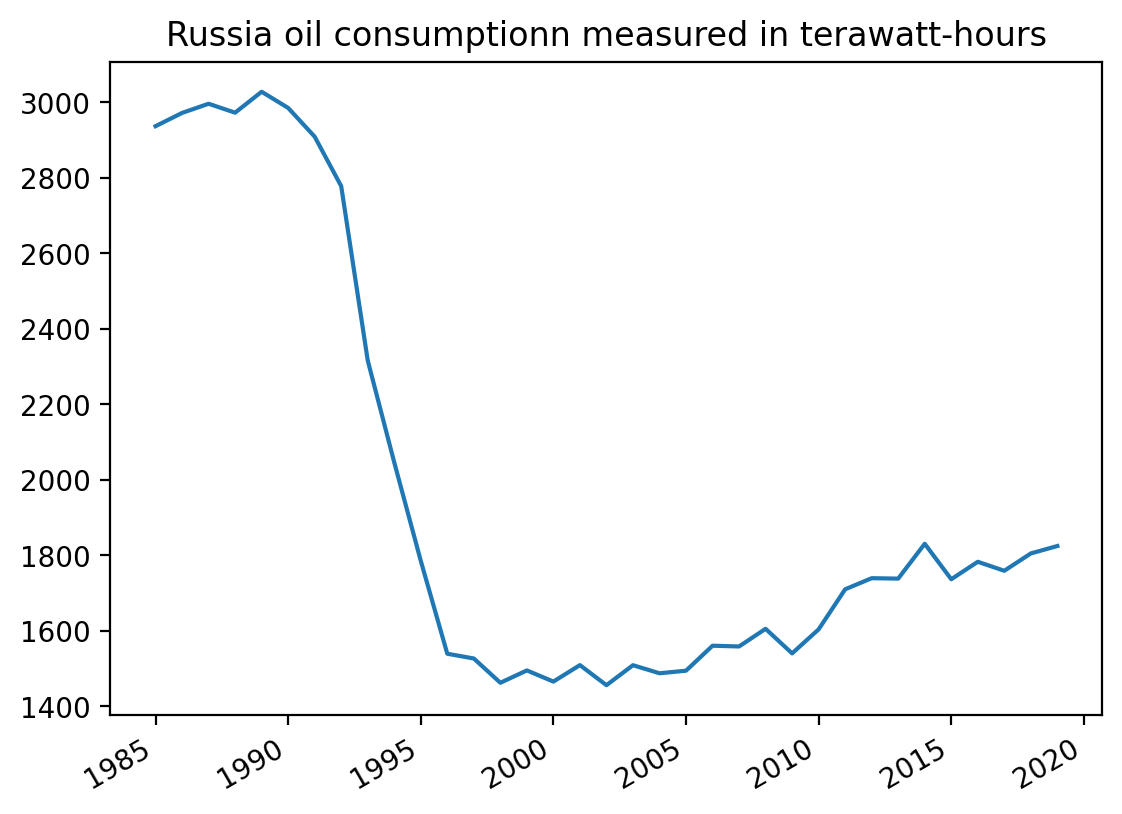

In [136]:
plt.plot(russia.year, russia.oil_consumption)
plt.title("Russia oil consumptionn measured in terawatt-hours")
plt.gcf().autofmt_xdate()
plt.show()

## Sweden

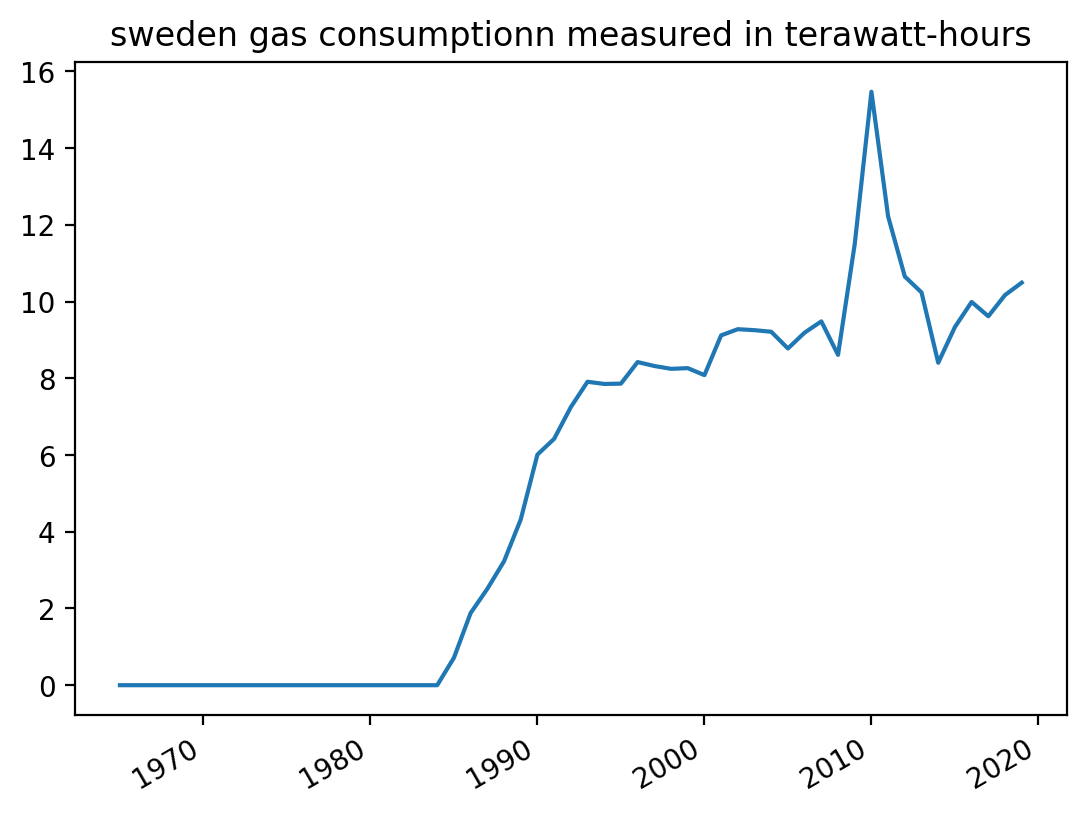

In [140]:
plt.plot(sweden.year, sweden.gas_consumption)
plt.title("Sweden gas consumptionn measured in terawatt-hours")
plt.gcf().autofmt_xdate()
plt.show()

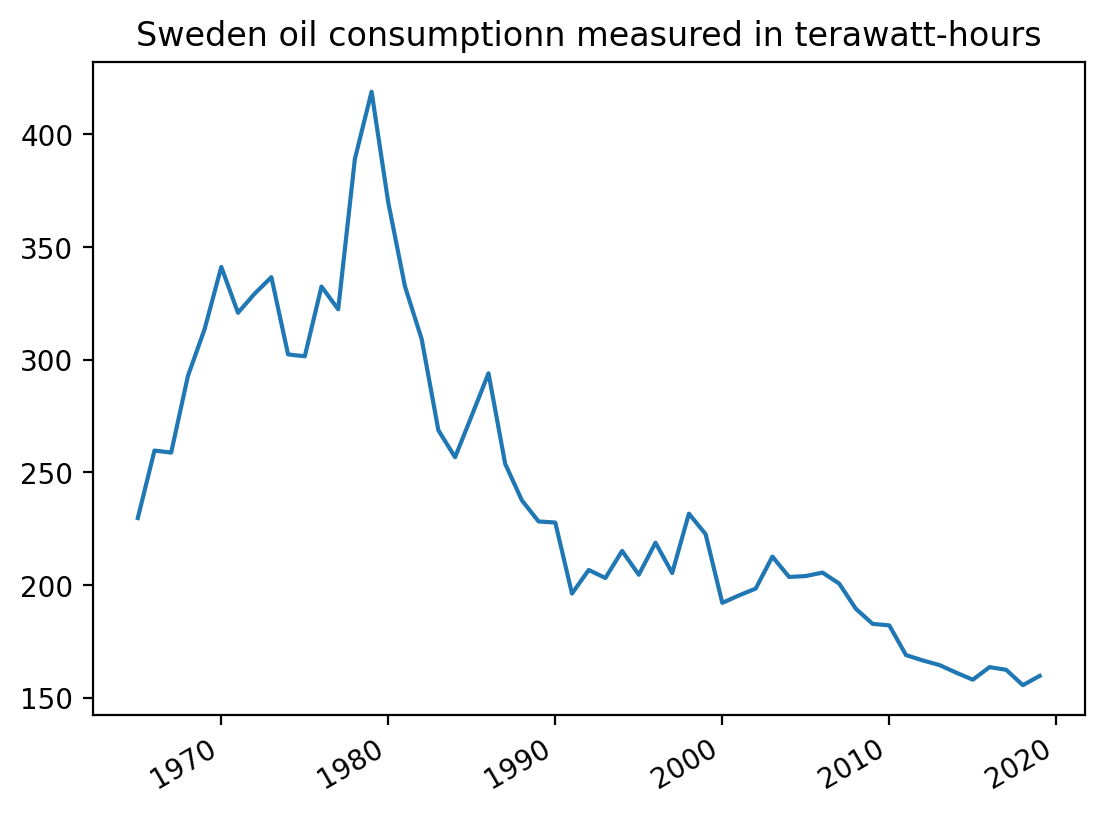

In [141]:
plt.plot(sweden.year, sweden.oil_consumption)
plt.title("Sweden oil consumptionn measured in terawatt-hours")
plt.gcf().autofmt_xdate()
plt.show()

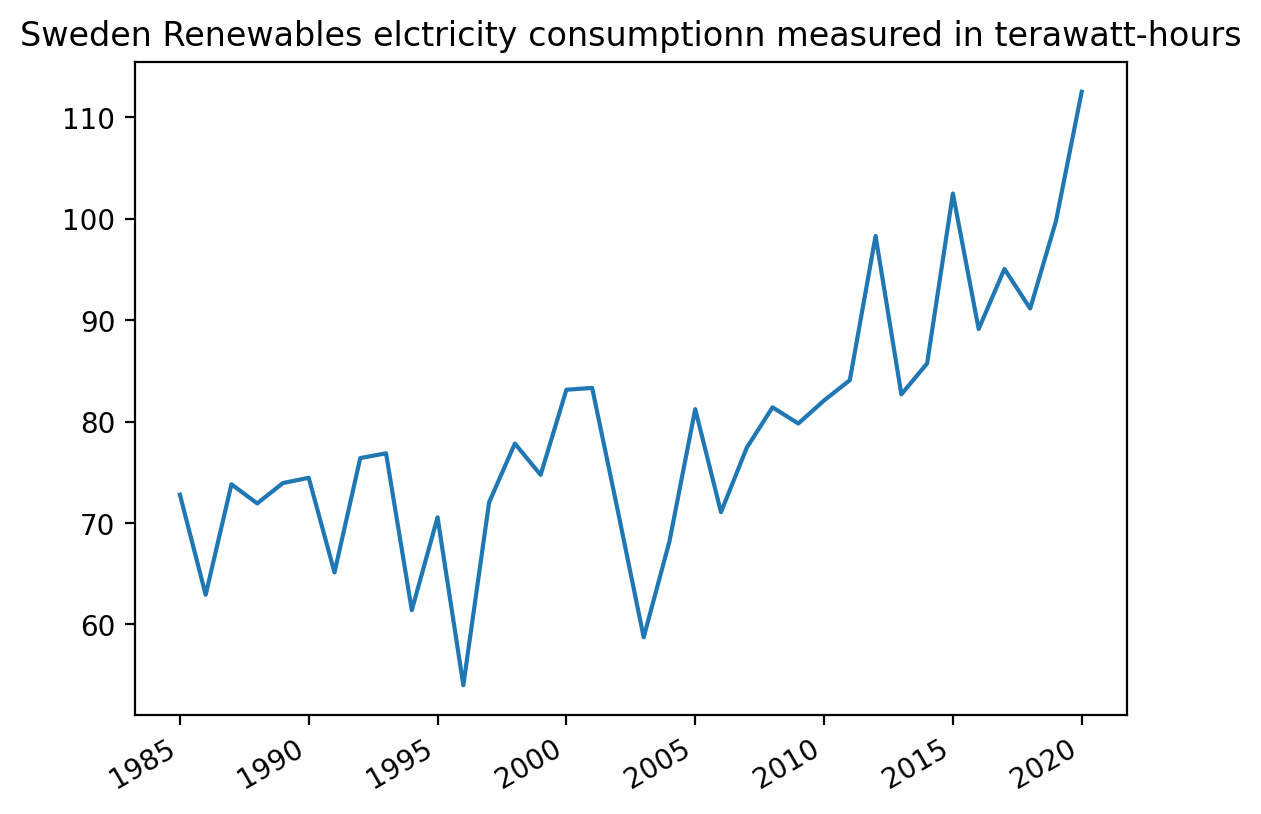

In [147]:
plt.plot(sweden.year, sweden.renewables_electricity)
plt.title("Sweden Renewables elctricity consumptionn measured in terawatt-hours")
plt.gcf().autofmt_xdate()
plt.show()

## Singapore

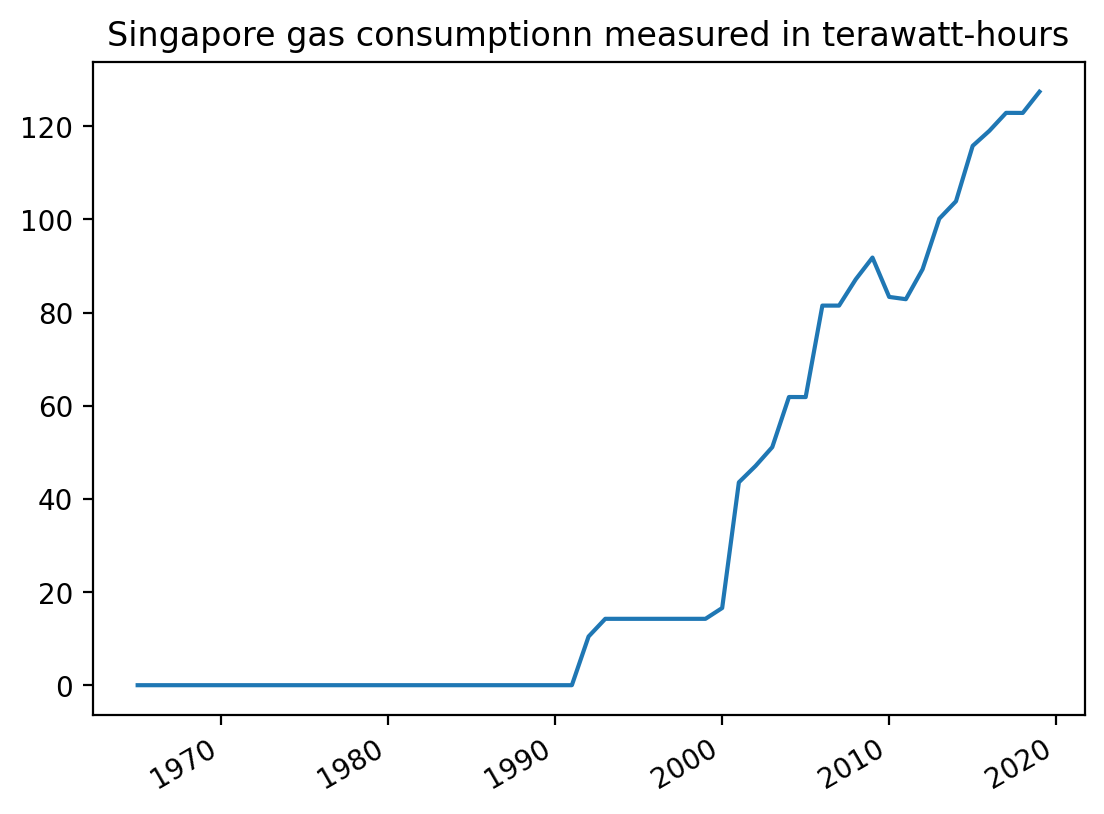

In [142]:
plt.plot(singapore.year, singapore.gas_consumption)
plt.title("Singapore gas consumptionn measured in terawatt-hours")
plt.gcf().autofmt_xdate()
plt.show()

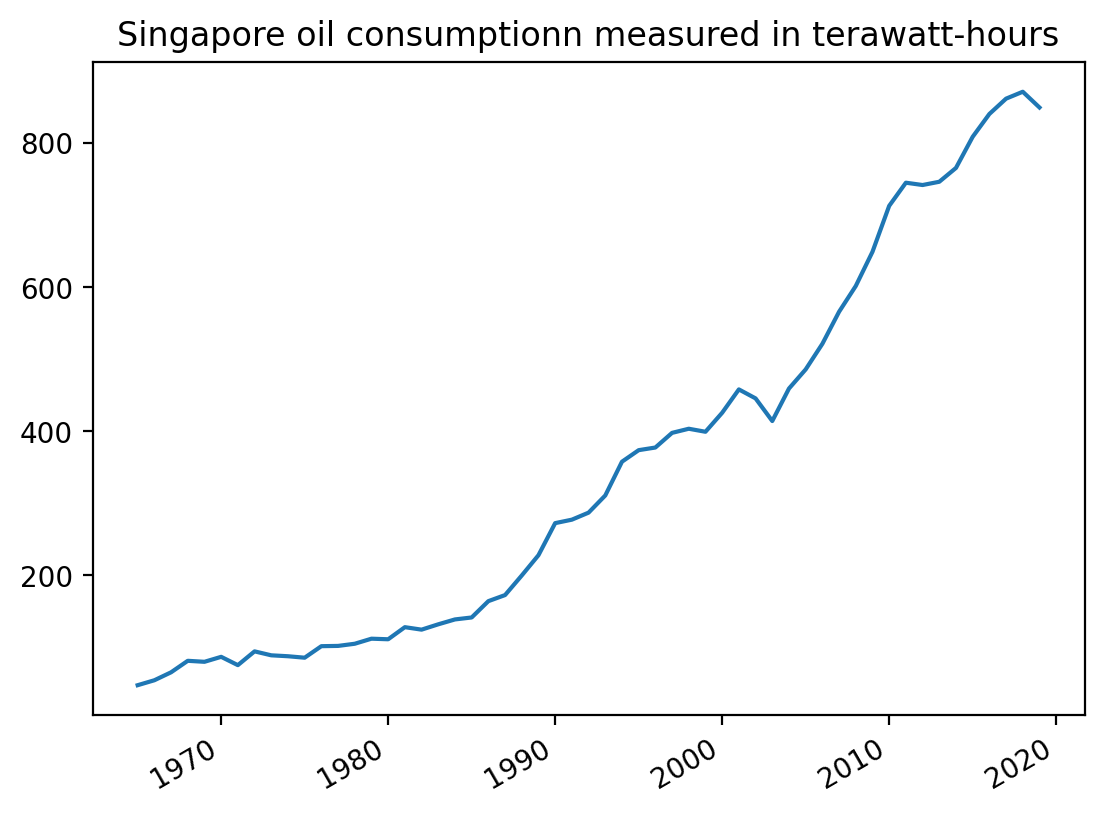

In [143]:
plt.plot(singapore.year, singapore.oil_consumption)
plt.title("Singapore oil consumptionn measured in terawatt-hours")
plt.gcf().autofmt_xdate()
plt.show()

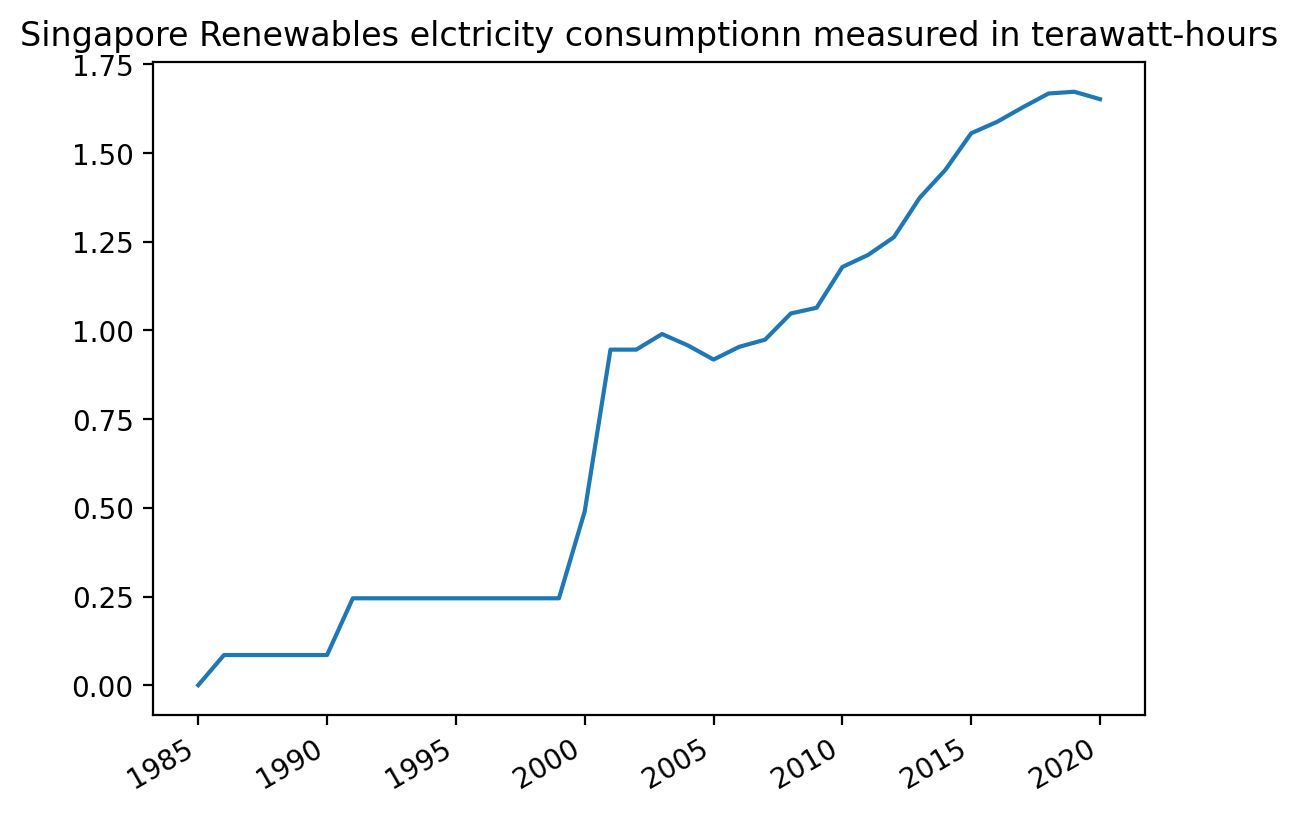

In [148]:
plt.plot(singapore.year, singapore.renewables_electricity)
plt.title("Singapore Renewables elctricity consumptionn measured in terawatt-hours")
plt.gcf().autofmt_xdate()
plt.show()

## Switzerland

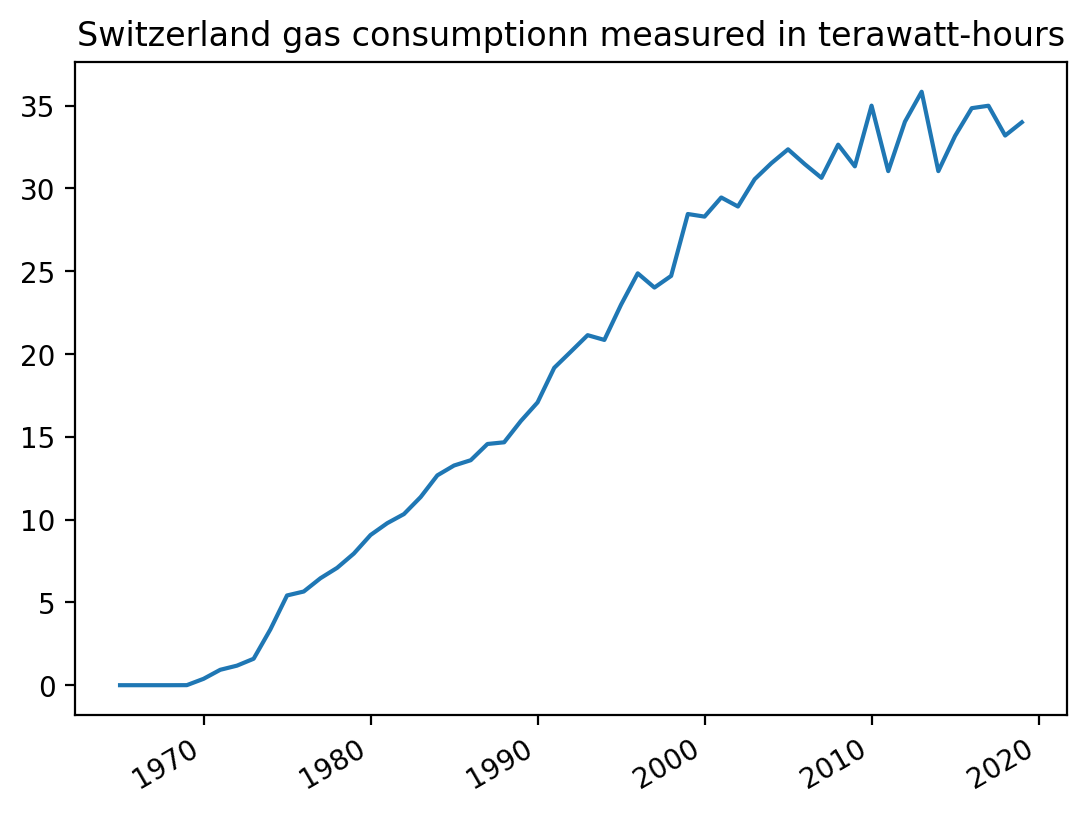

In [145]:
plt.plot(switzerland.year, switzerland.gas_consumption)
plt.title("Switzerland gas consumptionn measured in terawatt-hours")
plt.gcf().autofmt_xdate()
plt.show()

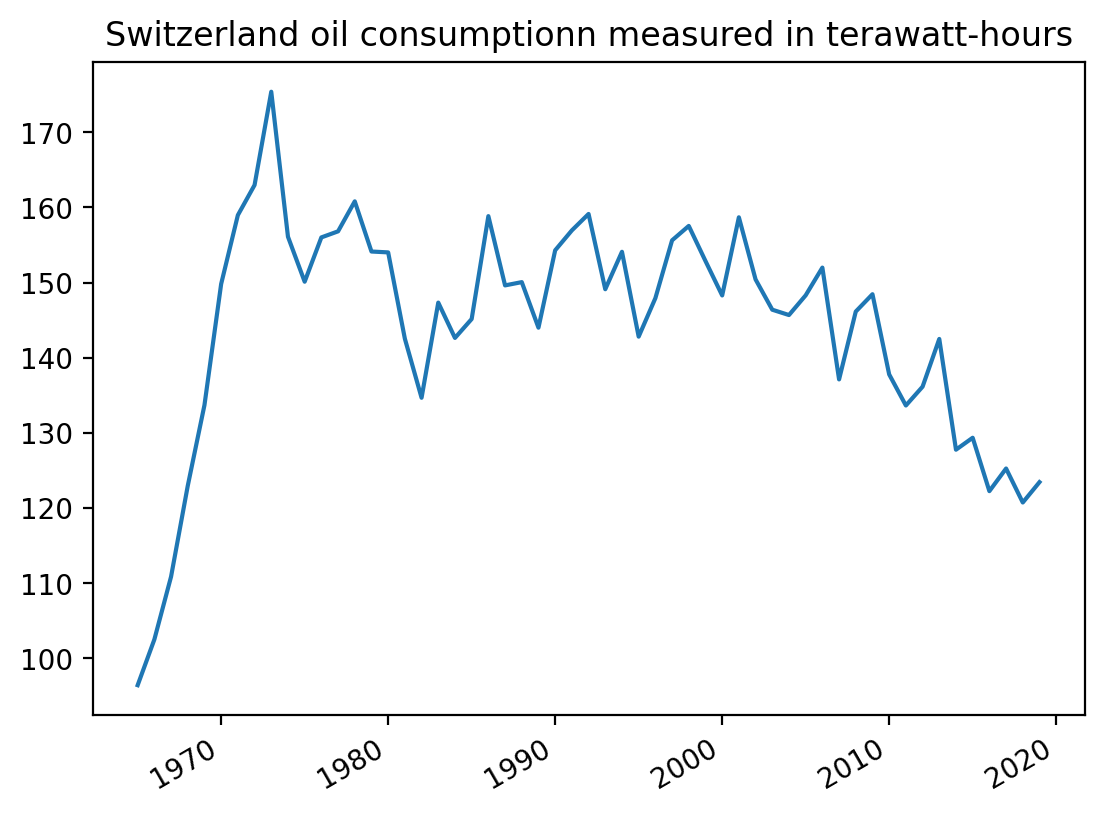

In [144]:
plt.plot(switzerland.year, switzerland.oil_consumption)
plt.title("Switzerland oil consumptionn measured in terawatt-hours")
plt.gcf().autofmt_xdate()
plt.show()

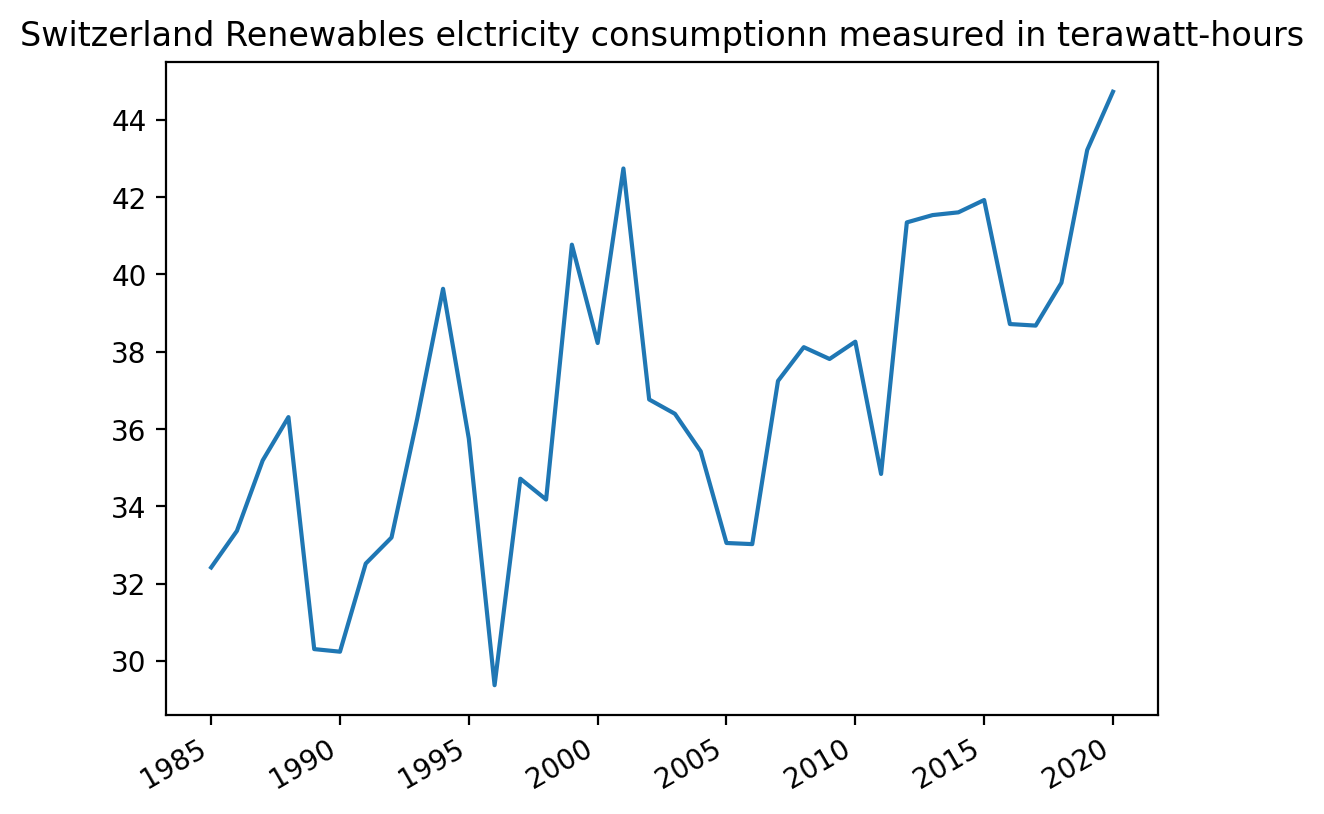

In [146]:
plt.plot(switzerland.year, switzerland.renewables_electricity)
plt.title("Switzerland Renewables elctricity consumptionn measured in terawatt-hours")
plt.gcf().autofmt_xdate()
plt.show()